# 1. Подготовка данных

# 1.1 и 1.2 Эфективность обогащения

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

Проводим загрузку данных и первичный анализ.

In [2]:
gold_recovery_train = pd.read_csv('/datasets/gold_recovery_train.csv')
display(gold_recovery_train.head())
gold_recovery_test = pd.read_csv('/datasets/gold_recovery_test.csv')
display(gold_recovery_test.head())
gold_recovery_full = pd.read_csv('/datasets/gold_recovery_full.csv')
display(gold_recovery_full.head())
print(gold_recovery_train.info())
print(gold_recovery_test.info())
print(gold_recovery_full.info())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>ОК, данные на базе)

In [3]:
gold_recovery_train['date'] = pd.to_datetime(gold_recovery_train['date'], format = '%Y-%m-%d')
gold_recovery_test['date'] = pd.to_datetime(gold_recovery_test['date'], format = '%Y-%m-%d')
gold_recovery_full['date'] = pd.to_datetime(gold_recovery_full['date'], format = '%Y-%m-%d')
gold_recovery_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null datetime64[ns]
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant     

In [4]:
C = gold_recovery_train['rougher.output.concentrate_au']
F = gold_recovery_train['rougher.input.feed_au']
T = gold_recovery_train['rougher.output.tail_au']

recovery_t = gold_recovery_train['rougher.output.recovery']

recovery = (C * (F - T))/(F * (C - T)) * 100

recovery = recovery.replace([np.inf, -np.inf], 0)

MAE = (abs(recovery - recovery_t)).sum()/ len (recovery)
print(MAE)


8.00350954615662e-15


In [29]:
************

SyntaxError: invalid syntax (<ipython-input-29-51a85a2a3b01>, line 1)

In [30]:
recovery.fillna(0, inplace=True)
recovery_t.fillna(0, inplace=True)

In [31]:
mean_absolute_error(recovery, recovery_t)

48.735241343008205

Вопрос перед первым ревью: почему mean_absolute_error не рассчитывает?

- Ошибка очень мала, а это значит, что эфективность обогощения рассчитана правильно.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 53 columns):
date                                          16860 non-null object
primary_cleaner.input.sulfate                 15553 non-null float64
primary_cleaner.input.depressant              15598 non-null float64
primary_cleaner.input.feed_size               16860 non-null float64
primary_cleaner.input.xanthate                15875 non-null float64
primary_cleaner.state.floatbank8_a_air        16820 non-null float64
primary_cleaner.state.floatbank8_a_level      16827 non-null float64
primary_cleaner.state.floatbank8_b_air        16820 non-null float64
primary_cleaner.state.floatbank8_b_level      16833 non-null float64
primary_cleaner.state.floatbank8_c_air        16822 non-null float64
primary_cleaner.state.floatbank8_c_level      16833 non-null float64
primary_cleaner.state.floatbank8_d_air        16821 non-null float64
primary_cleaner.state.floatbank8_d_level      16833 non-null fl

Оставил в train выборке только те факторы, которые есть в выборке test.

<b>Данные, которых не достаёт в тестовой выборке:</b>
- Окончательный результат;
- выход после первой очистки;
- грубый расчёт;
- грубый выход;
- выход после второй очистки.

Все параметры типа float.

Итоги первичного исследования:
- gold_recovery_train:
    - выборка train состоит из 16860 объектов и 87 признаков;
    - один из столбцов имел изначально тип object (date), я преобразовал его в тип datetime64[ns];
    - в данных обнаружены пропуски.
- gold_recovery_test:
    - выборка test состоит из 5856 оьъектов и 52 признаков;
    - в данных обнаружены пропуски;
    - один из столбцов имел изначально тип object (date), я преобразовал его в тип datetime64[ns].
- gold_recovery_full:
    - выборка full состоит из 22716 объектов и 87 признаков;
    - в данных обнаружены пропуски;
    - один из столбцов имел изначально тип object (date), я преобразовал его в тип datetime64[ns].

In [5]:
#len(gold_recovery_train['date']) + len(gold_recovery_test['date'])
if len(gold_recovery_full['date']) == len(gold_recovery_train['date']) + len(gold_recovery_test['date']):
    print('Сумма объектов двух датасетов (train & test) равна количеству объектов полного датасета (full)')
else:
        print('Сумма объектов двух датасетов (train & test) не равна количеству объектов полного датасета (full)')

Сумма объектов двух датасетов (train & test) равна количеству объектов полного датасета (full)


Можем видеть, что суммарное число объектов train и test равно количеству объектов полного датасета. Можно сделать промежуточное предположение о том, что полный датасет был поделен на train и test.

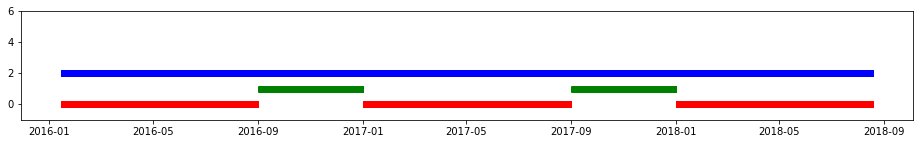

In [6]:
plt.figure(figsize=(16,2))
plt.plot(gold_recovery_train['date'], [0]*len(gold_recovery_train), '|', color='r', label='Тренировочный датасет')
plt.plot(gold_recovery_test['date'], [1]*len(gold_recovery_test), '|', color='g', label='Тестовый датасет')
plt.plot(gold_recovery_full['date'], [2]*len(gold_recovery_full), '|', color='b', label='Полный датасет')
plt.ylim(-1, 6);

Можем видеть, что наши предположения оказались верными.

### Предобработка данных

Далее проверим датасет на дубликаты.

In [7]:
print(gold_recovery_train.duplicated().sum())

0


In [8]:
print(gold_recovery_test.duplicated().sum())

0


In [9]:
print(gold_recovery_full.duplicated().sum())

0


Ни в одном из датасетов ни оказалось дубликатов.

100.0
0.0


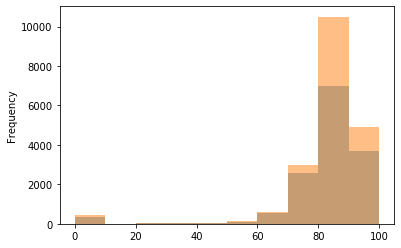

In [10]:
y_0 = gold_recovery_train['rougher.output.recovery']
#y_1 = gold_recovery_test['rougher.output.recovery']
y_2 = gold_recovery_full['rougher.output.recovery']
y_0.plot(kind = 'hist', alpha = 0.5)
#y_1.plot(kind = 'hist', alpha = 0.5)
y_2.plot(kind = 'hist', alpha = 0.5)
print(gold_recovery_train['rougher.output.recovery'].max())
print(gold_recovery_train['rougher.output.recovery'].min())

In [11]:
print(gold_recovery_train.isna().sum()) 

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64


In [12]:
print(gold_recovery_test.isna().sum()) 

date                                            0
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                166
primary_cleaner.state.floatbank8_a_air         16
primary_cleaner.state.floatbank8_a_level       16
primary_cleaner.state.floatbank8_b_air         16
primary_cleaner.state.floatbank8_b_level       16
primary_cleaner.state.floatbank8_c_air         16
primary_cleaner.state.floatbank8_c_level       16
primary_cleaner.state.floatbank8_d_air         16
primary_cleaner.state.floatbank8_d_level       16
rougher.input.feed_ag                          16
rougher.input.feed_pb                          16
rougher.input.feed_rate                        40
rougher.input.feed_size                        22
rougher.input.feed_sol                         67
rougher.input.feed_au                          16
rougher.input.floatbank10_sulfate             257


In [13]:
print(gold_recovery_full.isna().sum()) 

date                                            0
final.output.concentrate_ag                    89
final.output.concentrate_pb                    87
final.output.concentrate_sol                  385
final.output.concentrate_au                    86
                                             ... 
secondary_cleaner.state.floatbank5_a_level    101
secondary_cleaner.state.floatbank5_b_air      101
secondary_cleaner.state.floatbank5_b_level    100
secondary_cleaner.state.floatbank6_a_air      119
secondary_cleaner.state.floatbank6_a_level    101
Length: 87, dtype: int64


<b>Данные нужно дополнить.</b>

In [14]:
data_list = [gold_recovery_train, gold_recovery_test, gold_recovery_full]
gold_recovery_train.name = 'gold_recovery_train'
gold_recovery_test.name = 'gold_recovery_train'
gold_recovery_full.name = 'gold_recovery_train'

In [15]:
def visual_df_nulls(df):
    #colours = ['#000099', "#ffff00"]
    #plt.figure(figsize = (10,10))
    #sns.heatmap(df.isnull(), cmap = sns.color_palette(colours))
    #plt.title(df.name + 'nulls')
    print('{:^52}{:^16}{:^20}'.format('Признак', 'Всего пропусков', 'Пропусков (%)'))
    for col in df.columns:
        missed_data_share = df[col].isnull().mean()*100
        missed_data_count = df[col].isnull().sum()
        print('{:^50}{:^14}{:^18.5f}'.format(col, missed_data_count, missed_data_share))
        
for data in data_list:
    print('{:^85}'.format(data.name))
    print('')
    visual_df_nulls(data)
    print()

                                 gold_recovery_train                                 

                      Признак                       Всего пропусков    Пропусков (%)    
                       date                             0            0.00000      
           final.output.concentrate_ag                  72           0.42705      
           final.output.concentrate_pb                  72           0.42705      
           final.output.concentrate_sol                370           2.19454      
           final.output.concentrate_au                  71           0.42112      
              final.output.recovery                    1521          9.02135      
               final.output.tail_ag                     66           0.39146      
               final.output.tail_pb                    183           1.08541      
              final.output.tail_sol                    145           0.86002      
               final.output.tail_au                     66           0.39146 

# Промежуточный вывод по пропускам:

В обучающем датасете процент пропусков в целом меньше 10%, но есть признаки, в которых пропущен больший процент. Первой мыслью было <b>"удалить пропуски"</b>, но так как их много, и мы можем потерять слишком много, то просто заполним NaN значения.

Далее мы визиуализируем данные, взглянув на выбросы.

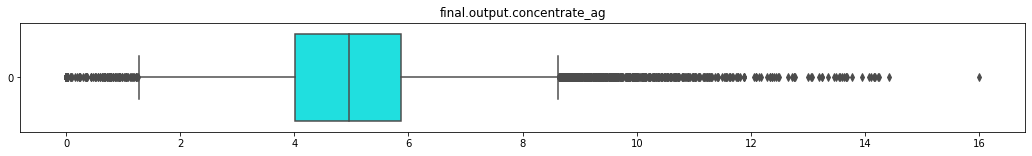

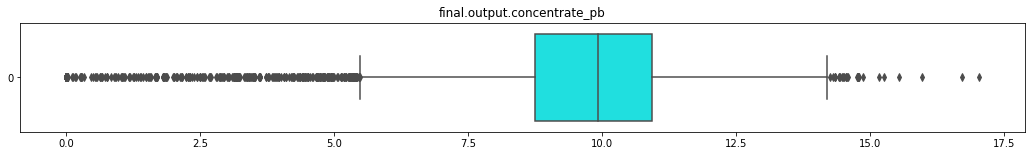

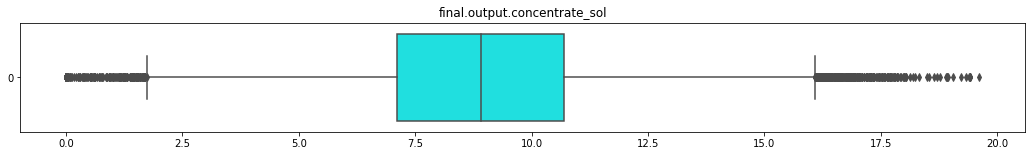

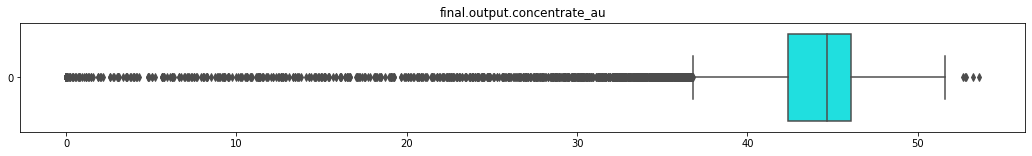

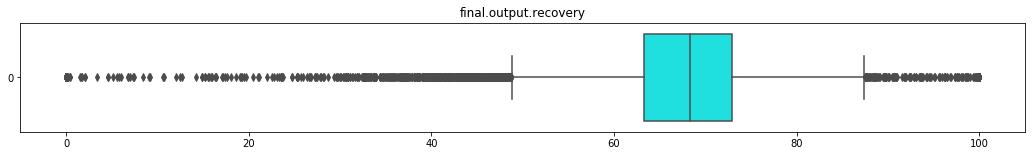

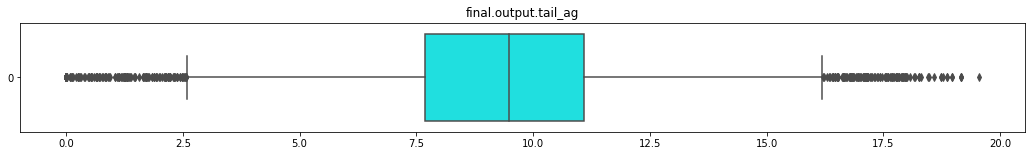

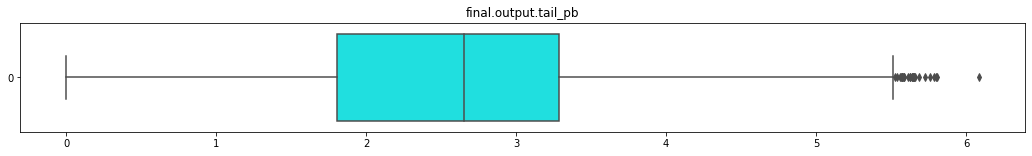

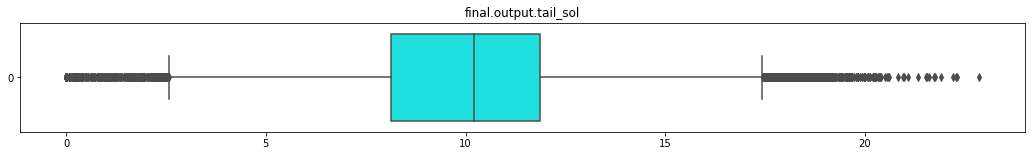

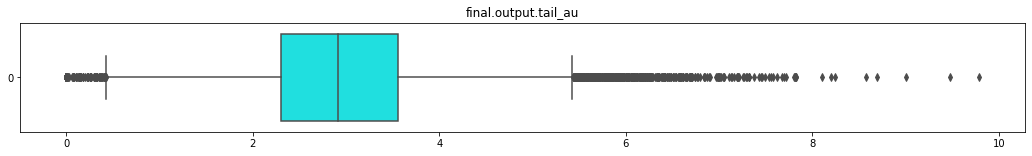

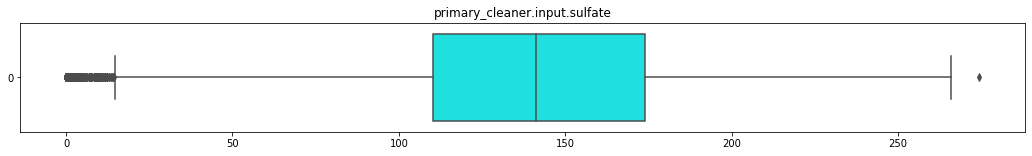

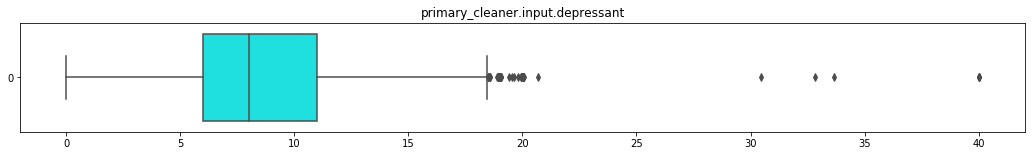

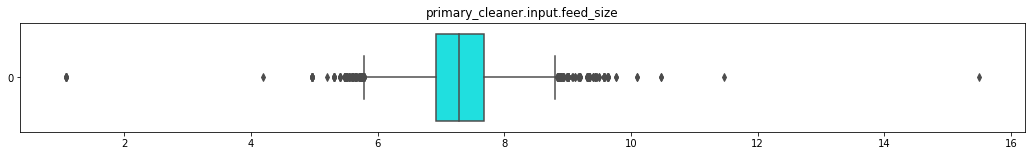

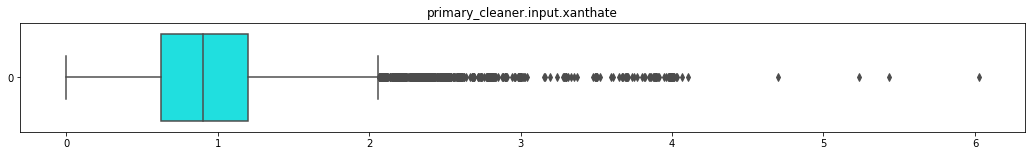

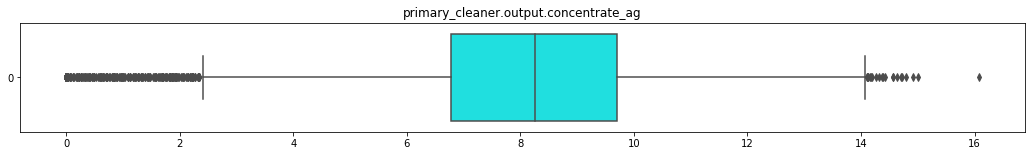

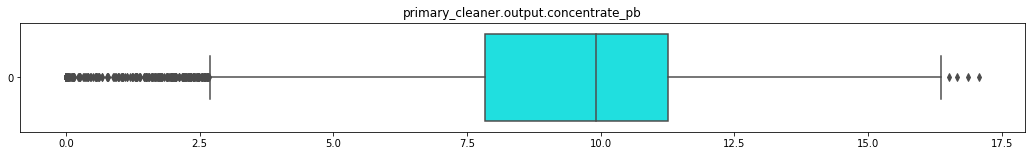

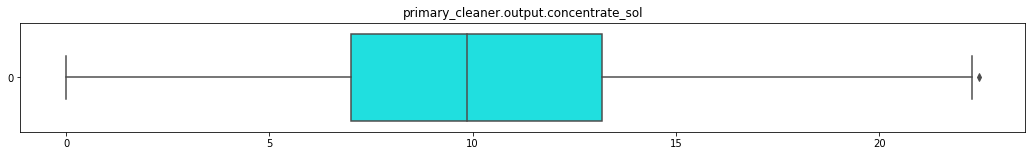

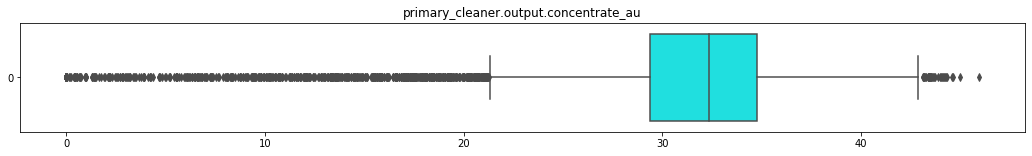

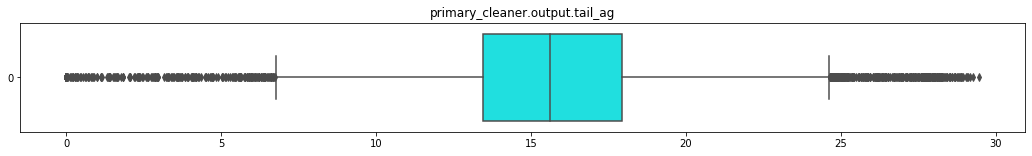

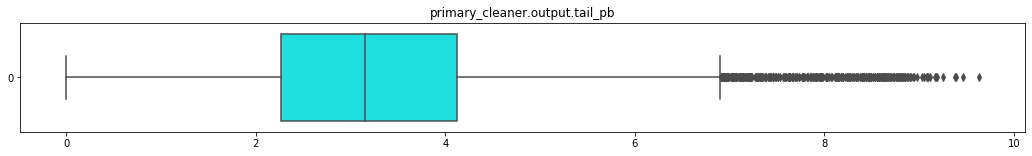

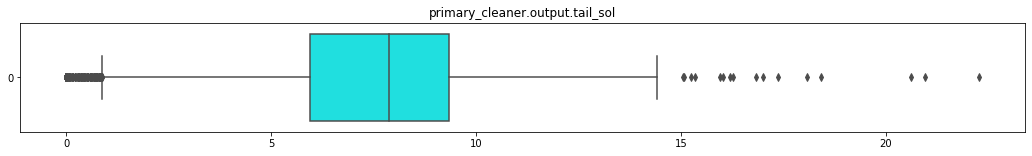

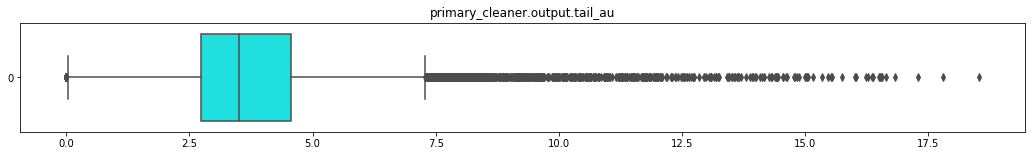

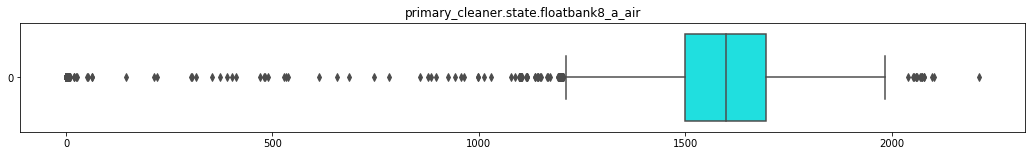

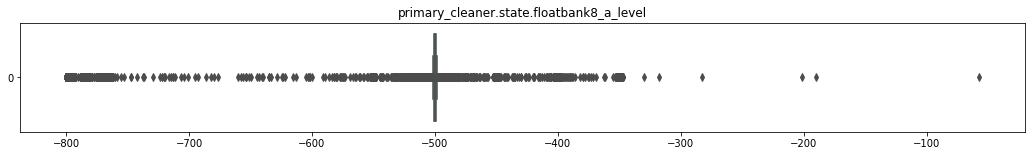

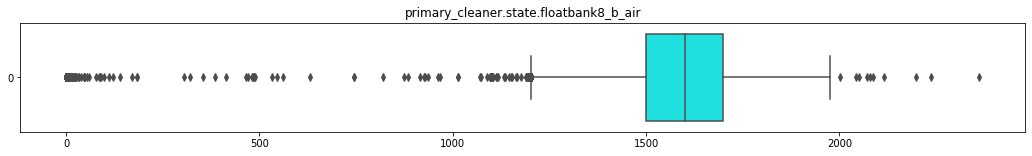

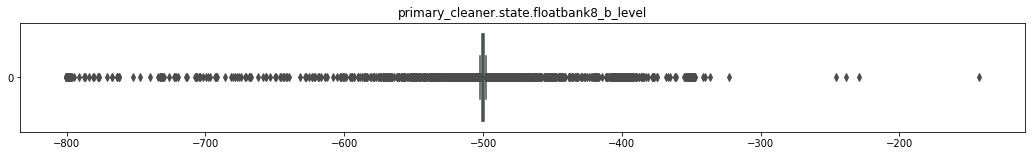

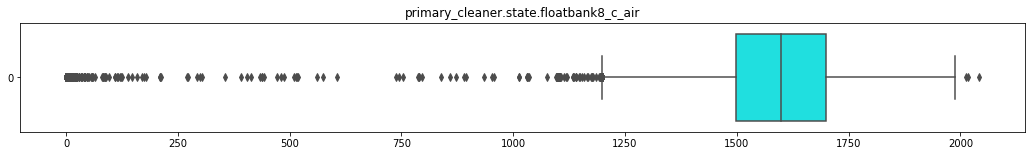

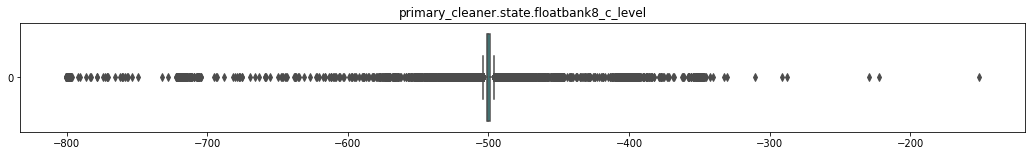

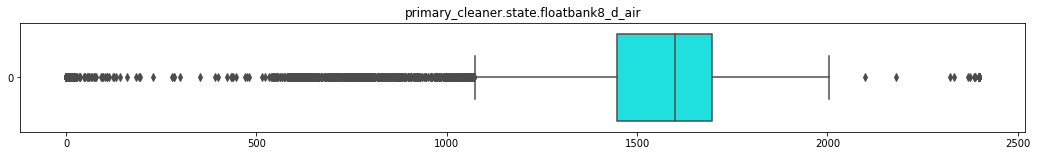

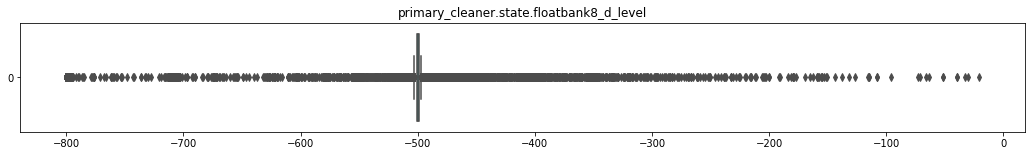

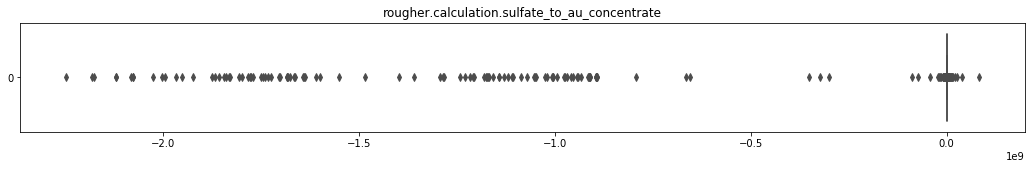

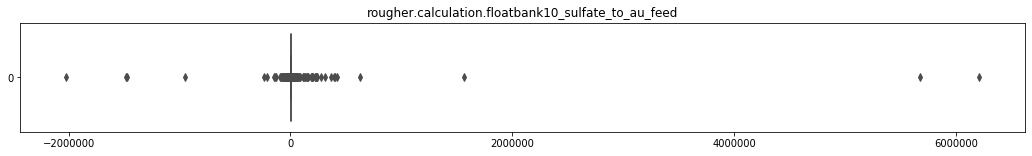

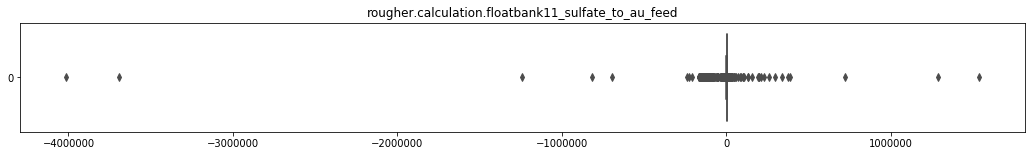

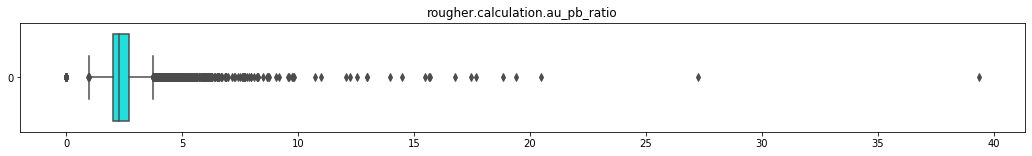

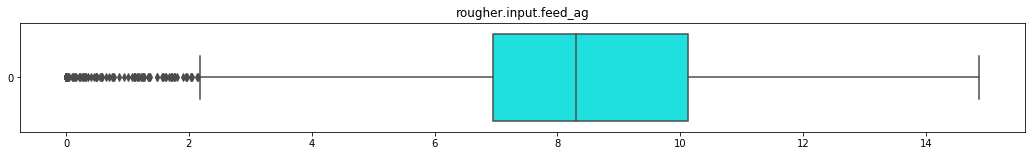

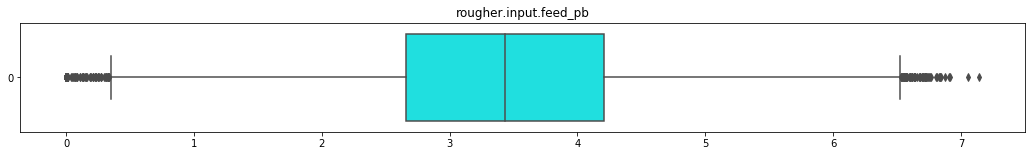

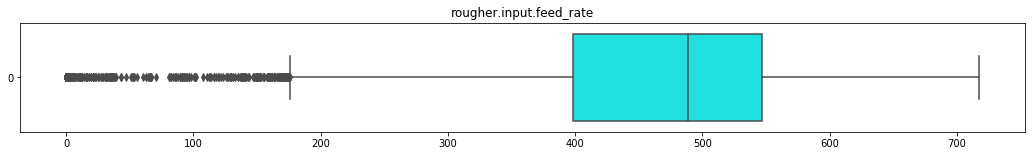

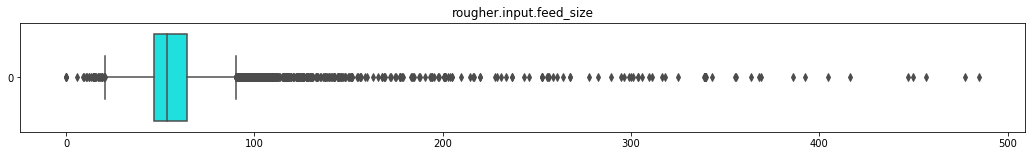

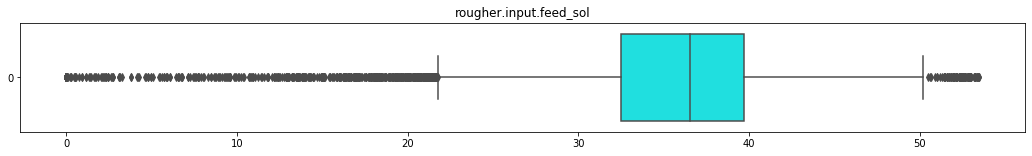

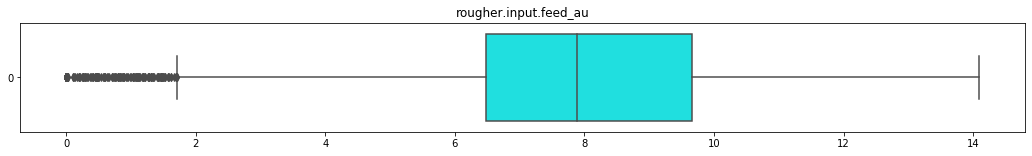

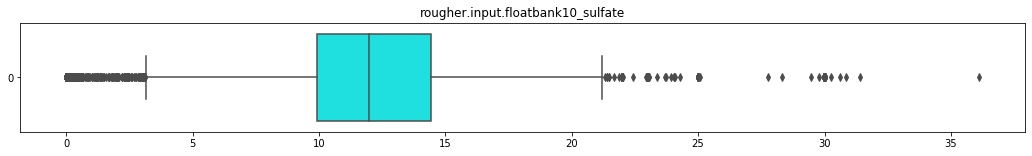

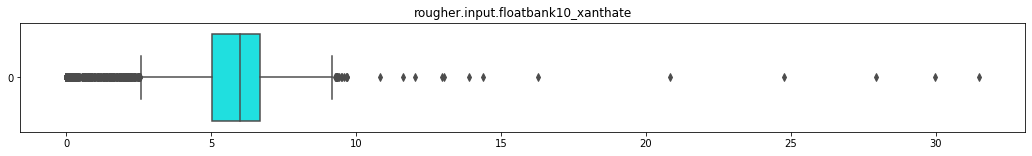

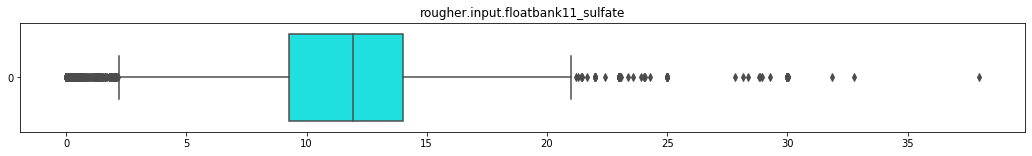

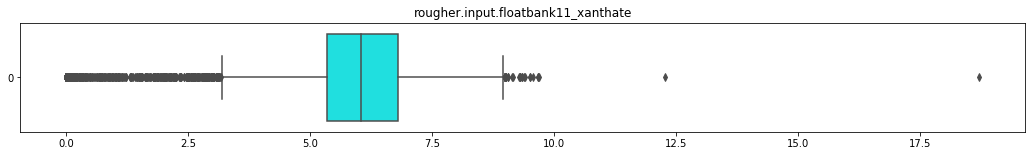

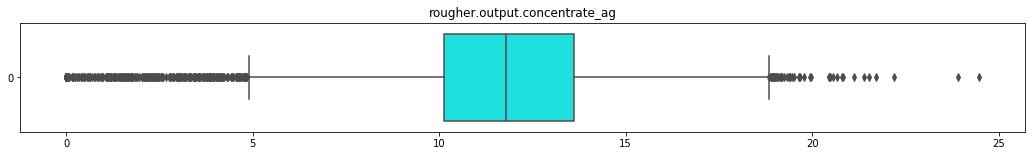

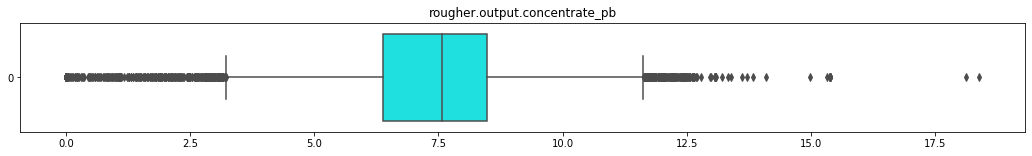

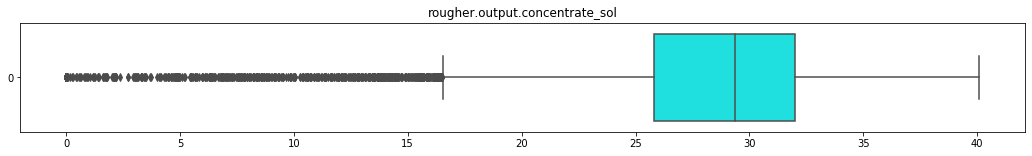

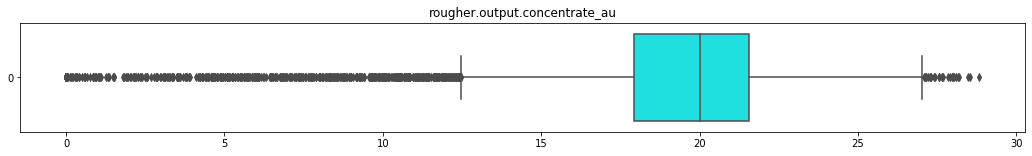

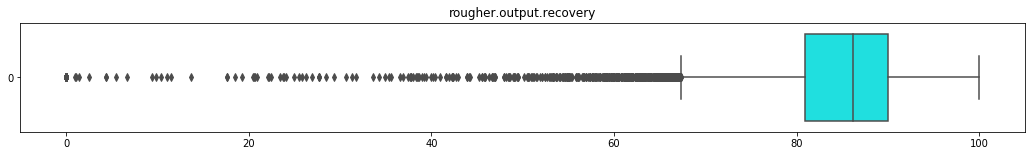

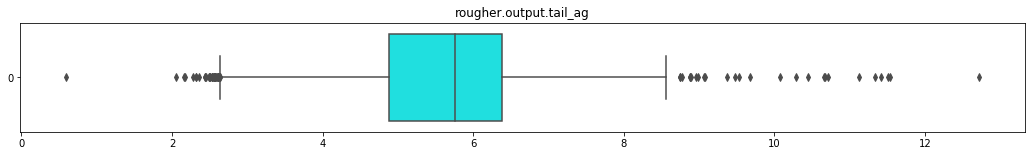

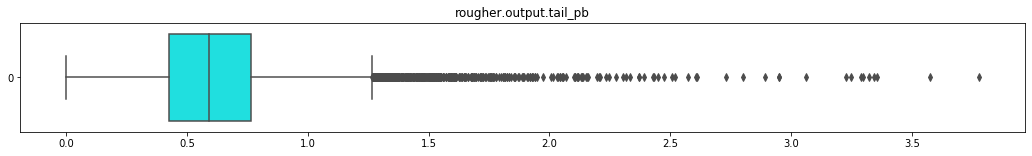

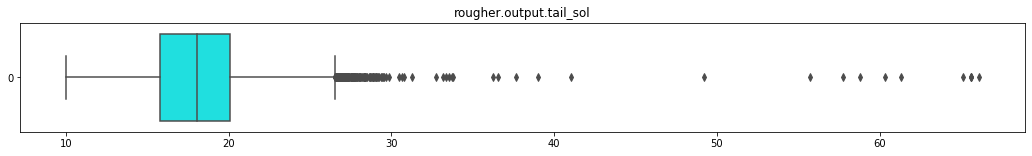

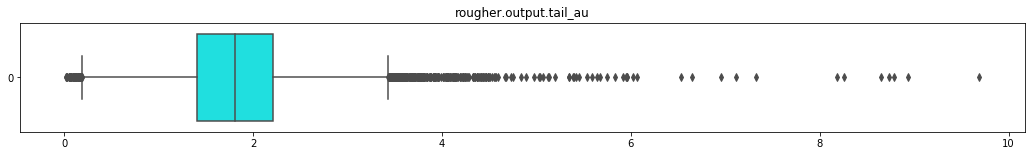

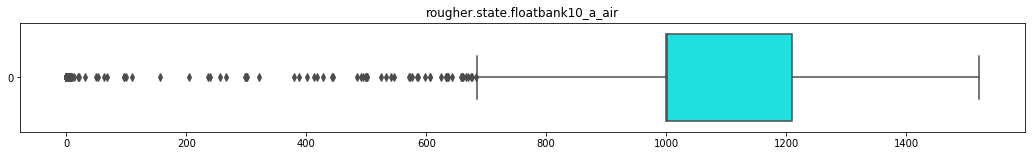

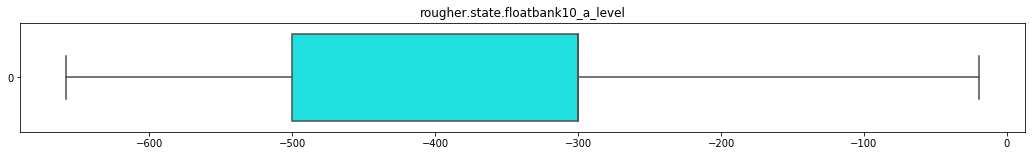

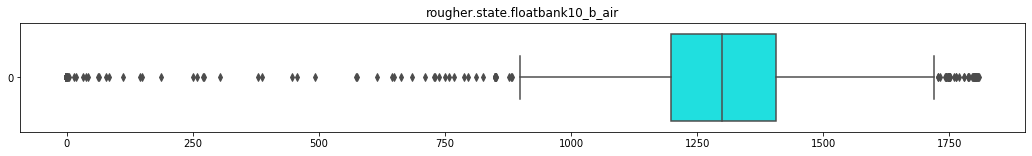

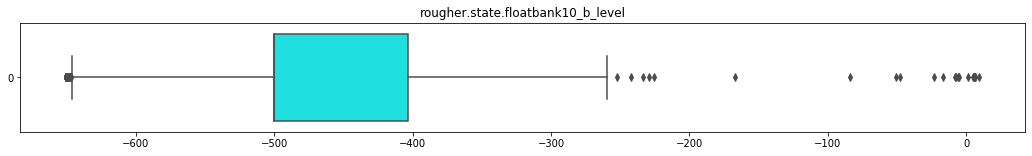

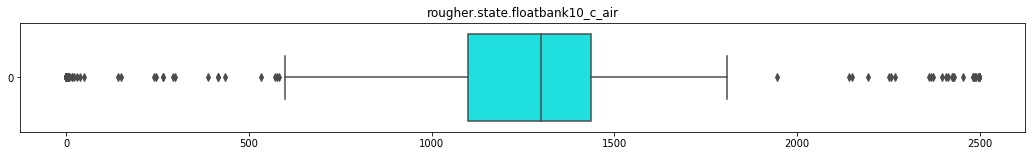

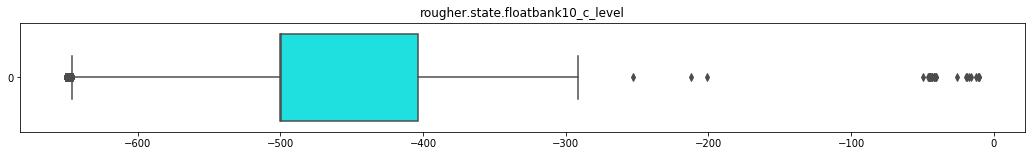

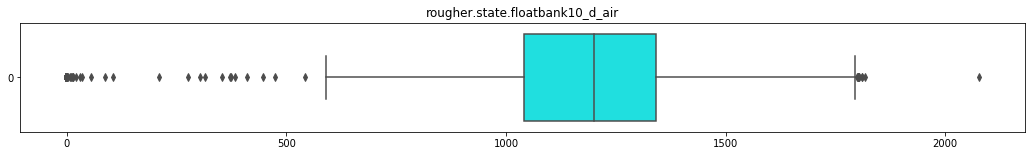

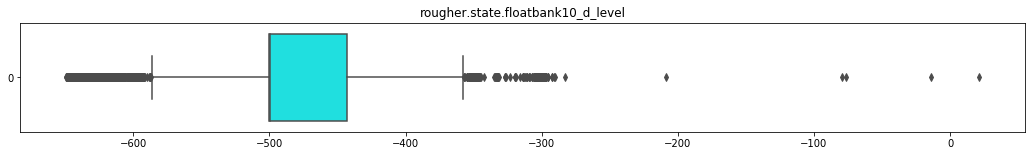

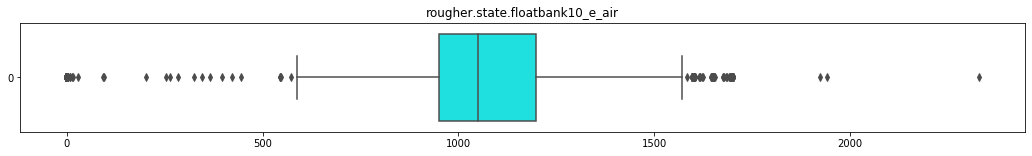

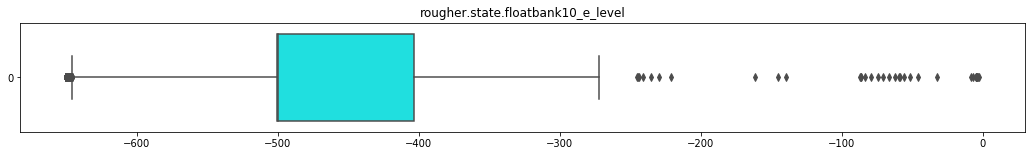

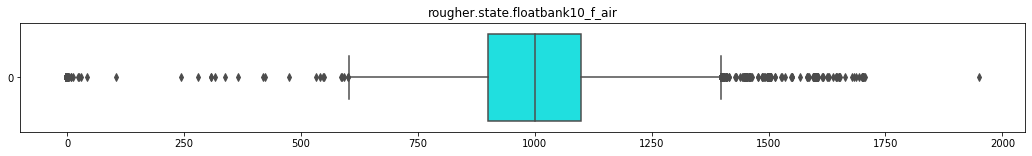

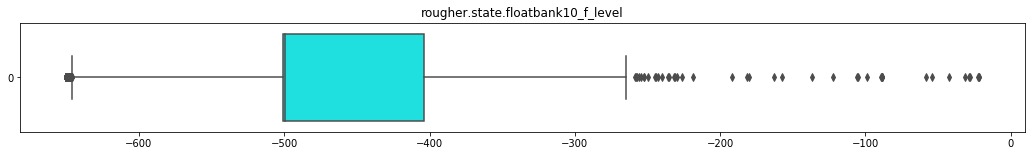

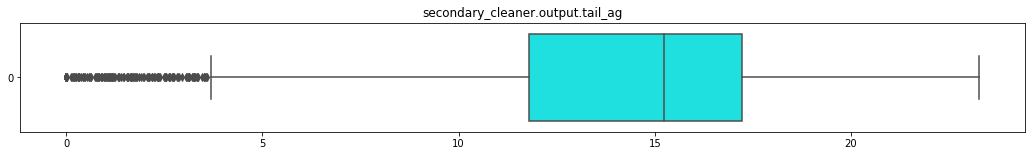

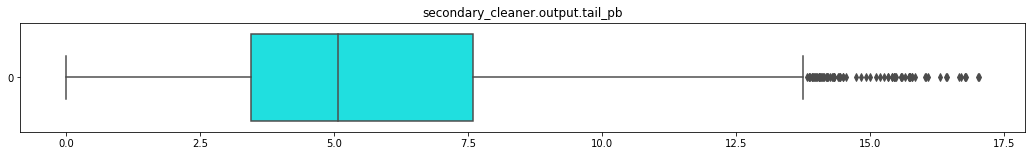

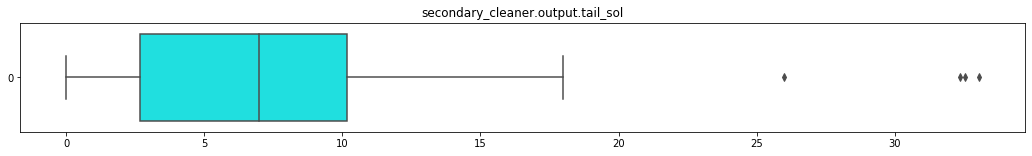

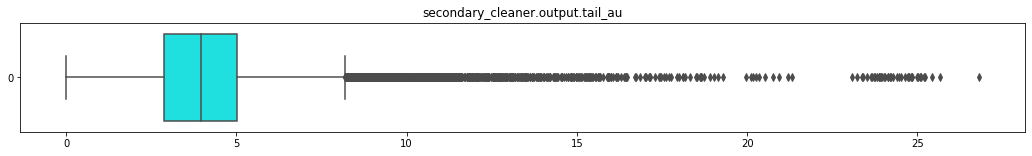

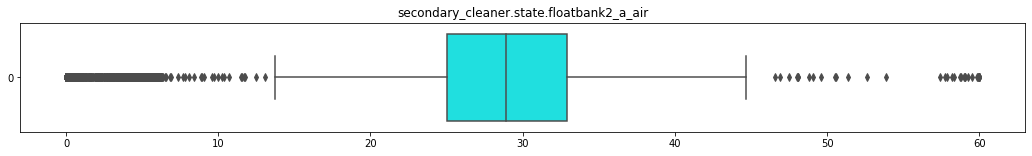

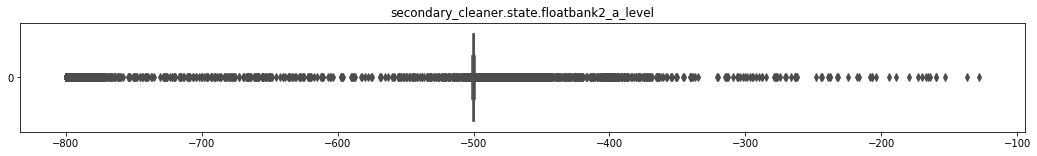

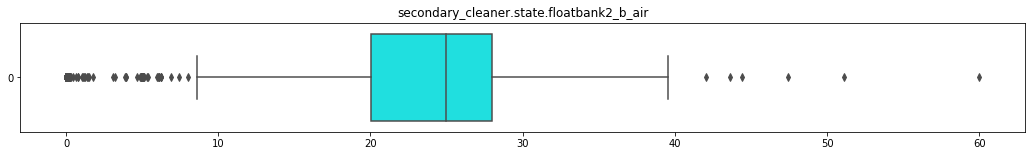

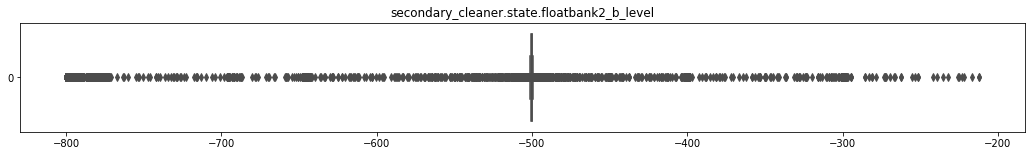

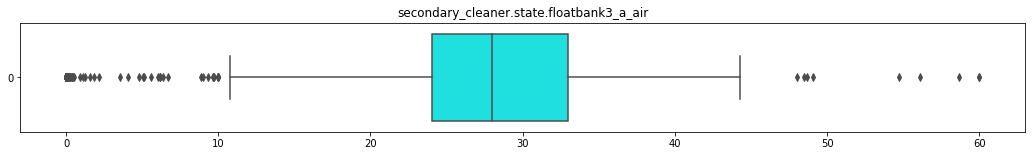

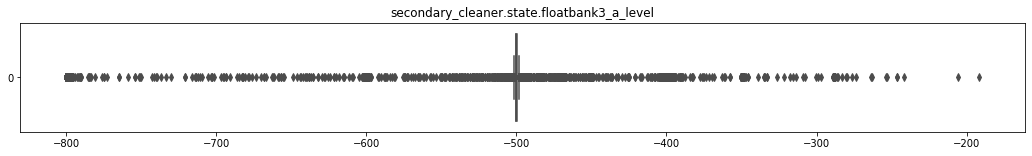

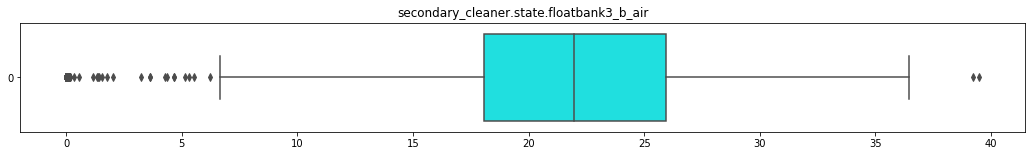

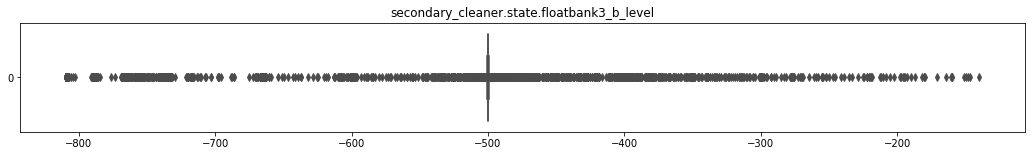

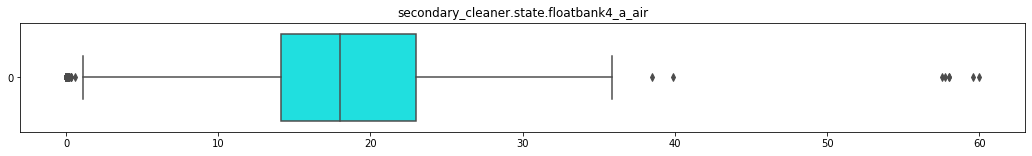

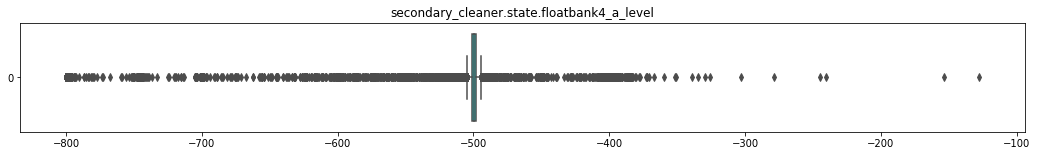

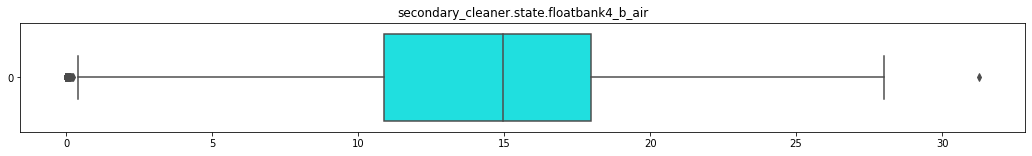

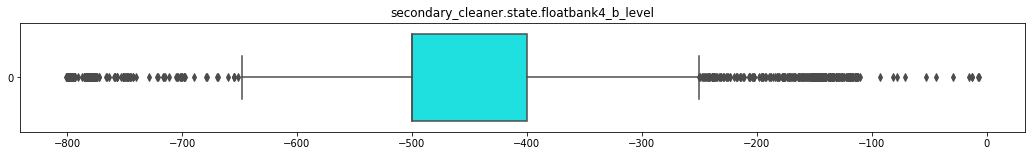

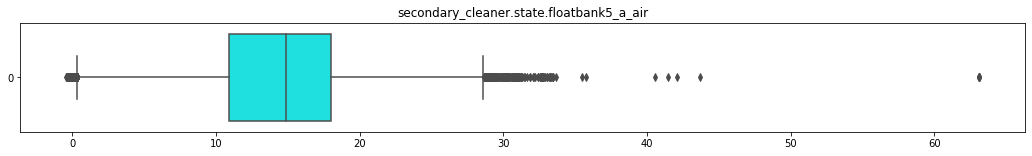

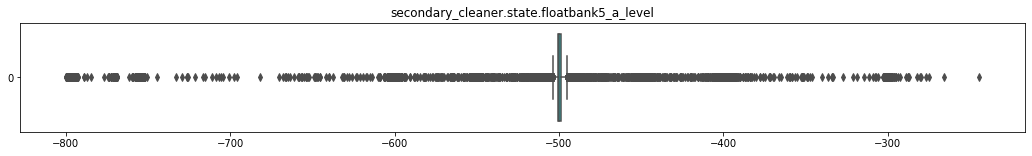

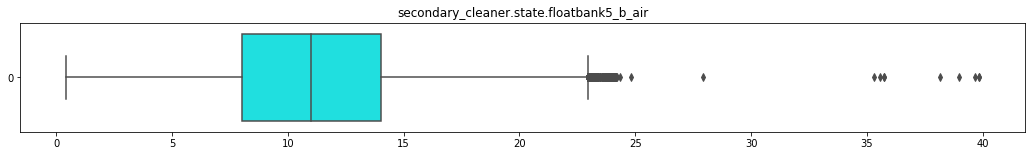

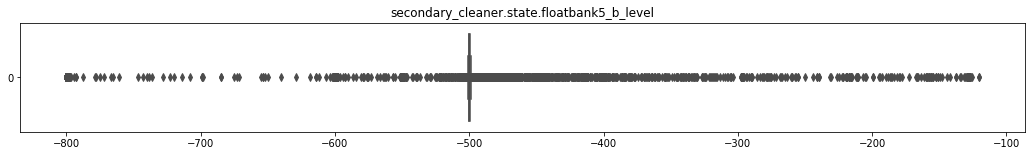

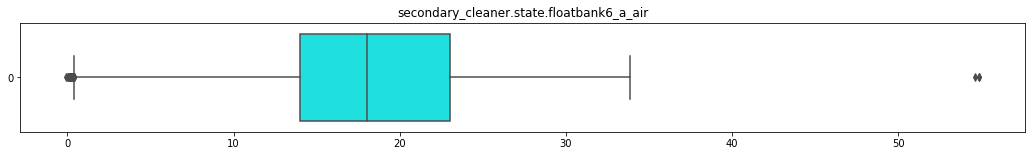

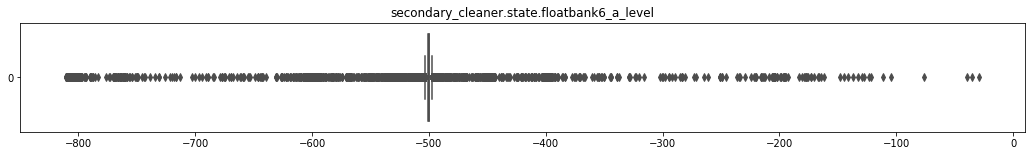

In [18]:
for col in gold_recovery_train.columns[1:]:
    plt.figure(figsize = (18, 2))
    sns.boxplot(data = gold_recovery_full[col], color = '#00FFFF', orient = 'h')
    plt.title(col)

Выбросов у нас достаточно много.

Далее анализируем данные, которых нет в тестовой выборке.

# 1.3 Признаки, которых нет в тестовой выборке

In [34]:
def drop_in_sets(data_1, data_2):
    data_3 = data_2.drop(data_1.columns, axis = 1)
    data_2 = data_2.drop(data_3.columns, axis = 1)
    return data_2

In [35]:
gold_recovery_train_new = drop_in_sets(gold_recovery_test, gold_recovery_train)
print('''''')
gold_recovery_train_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 53 columns):
date                                          16860 non-null datetime64[ns]
primary_cleaner.input.sulfate                 15553 non-null float64
primary_cleaner.input.depressant              15598 non-null float64
primary_cleaner.input.feed_size               16860 non-null float64
primary_cleaner.input.xanthate                15875 non-null float64
primary_cleaner.state.floatbank8_a_air        16820 non-null float64
primary_cleaner.state.floatbank8_a_level      16827 non-null float64
primary_cleaner.state.floatbank8_b_air        16820 non-null float64
primary_cleaner.state.floatbank8_b_level      16833 non-null float64
primary_cleaner.state.floatbank8_c_air        16822 non-null float64
primary_cleaner.state.floatbank8_c_level      16833 non-null float64
primary_cleaner.state.floatbank8_d_air        16821 non-null float64
primary_cleaner.state.floatbank8_d_level      16833 non

Параметры явзяются либо рассчитанными, либо выходными на разных стадиях. Помимо прочего, в тестовом наборе отсутствуют целевые признаки. Некоторые параметры недоступны, либо же отсутствуют по причине того, что рассчитываются позже. Тем самым мы объяснили отсутствие в test некоторых признаков, которые присутствуют в train.

# 1.4 Предобработка данных
# Убираю NaN значения

In [13]:
'''
def data_info(data):
    #print(f'Количество NaN в таблице = {data.isna().sum()}')
    #print(data.count())
    '''
    s6 = pd.Series(data.isna().sum())
    display(s6[s6 > 0])
    print(s6.index)
    '''
    s6 = {'count_of_NaN':np.array(data.isna().sum())}
    s7 = pd.DataFrame(s6, index = pd.Series(data.isna().sum()).index).reset_index()
    #display(s7)
    s8 = s7[s7['count_of_NaN'] > 0]
    #display(s8)
    
    
    s8['%'] = pd.Series(100 * s8['count_of_NaN']/len(data), index=s8.index)
    display(s8)
    display(s8[s8['%'] > 5].sort_values(by = '%', ascending = True))
    '''
    
    
    
    
    '''
    for i in range(len(data.T)):
        if data.T.loc[i, :].isna().sum() > 0:
            print(f'Количество NaN в таблице в столбце {i} = {data.T.loc[i, :].isna().sum()}')
            '''

In [14]:
#data_info(gold_recovery_train)

,index,count_of_NaN,%
1,final.output.concentrate_ag,72,0.427046
2,final.output.concentrate_pb,72,0.427046
3,final.output.concentrate_sol,370,2.194543
4,final.output.concentrate_au,71,0.421115
5,final.output.recovery,1521,9.021352
...,...,...,...
82,secondary_cleaner.state.floatbank5_a_level,85,0.504152
83,secondary_cleaner.state.floatbank5_b_air,85,0.504152
84,secondary_cleaner.state.floatbank5_b_level,84,0.498221
85,secondary_cleaner.state.floatbank6_a_air,103,0.610913


,index,count_of_NaN,%
13,primary_cleaner.input.xanthate,985,5.842230
40,rougher.input.floatbank10_sulfate,1044,6.192171
33,rougher.calculation.au_pb_ratio,1242,7.366548
11,primary_cleaner.input.depressant,1262,7.485172
10,primary_cleaner.input.sulfate,1307,7.752076
5,final.output.recovery,1521,9.021352
43,rougher.input.floatbank11_xanthate,1904,11.293001
67,secondary_cleaner.output.tail_sol,1986,11.779359
51,rougher.output.tail_sol,2249,13.339265
52,rougher.output.tail_au,2249,13.339265


In [15]:
#data_info(gold_recovery_test)

,index,count_of_NaN,%
1,primary_cleaner.input.sulfate,302,5.157104
2,primary_cleaner.input.depressant,284,4.849727
4,primary_cleaner.input.xanthate,166,2.834699
5,primary_cleaner.state.floatbank8_a_air,16,0.273224
6,primary_cleaner.state.floatbank8_a_level,16,0.273224
7,primary_cleaner.state.floatbank8_b_air,16,0.273224
8,primary_cleaner.state.floatbank8_b_level,16,0.273224
9,primary_cleaner.state.floatbank8_c_air,16,0.273224
10,primary_cleaner.state.floatbank8_c_level,16,0.273224
11,primary_cleaner.state.floatbank8_d_air,16,0.273224


,index,count_of_NaN,%
1,primary_cleaner.input.sulfate,302,5.157104
22,rougher.input.floatbank11_xanthate,353,6.028005


In [16]:
#data_info(gold_recovery_full)

,index,count_of_NaN,%
1,final.output.concentrate_ag,89,0.391794
2,final.output.concentrate_pb,87,0.382990
3,final.output.concentrate_sol,385,1.694841
4,final.output.concentrate_au,86,0.378588
5,final.output.recovery,1963,8.641486
...,...,...,...
82,secondary_cleaner.state.floatbank5_a_level,101,0.444621
83,secondary_cleaner.state.floatbank5_b_air,101,0.444621
84,secondary_cleaner.state.floatbank5_b_level,100,0.440218
85,secondary_cleaner.state.floatbank6_a_air,119,0.523860


,index,count_of_NaN,%
13,primary_cleaner.input.xanthate,1151,5.066913
40,rougher.input.floatbank10_sulfate,1301,5.727241
11,primary_cleaner.input.depressant,1546,6.805776
10,primary_cleaner.input.sulfate,1609,7.083113
33,rougher.calculation.au_pb_ratio,1627,7.162353
5,final.output.recovery,1963,8.641486
67,secondary_cleaner.output.tail_sol,2215,9.750836
43,rougher.input.floatbank11_xanthate,2257,9.935728
51,rougher.output.tail_sol,2736,12.044374
52,rougher.output.tail_au,2736,12.044374


<div class="alert alert-info" role="alert"><b>
КОММЕНТАРИИ СТУДЕНТА ПОСЛЕ ПЕРВОГО РЕВЬЮ:</b> проблема решена! Так же поднял решение с процентом пропусков немного выше.
</div>

Пропущеных значений очень много, поэтому заменим их методом interpolate.

In [17]:
#a = gold_recovery_train.interpolate(method='linear', limit_direction='forward', axis=0)

In [18]:
#data_info(a)

,index,count_of_NaN,%


,index,count_of_NaN,%


In [19]:
#a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16860 non-null float64
final.output.concentrate_pb                           16860 non-null float64
final.output.concentrate_sol                          16860 non-null float64
final.output.concentrate_au                           16860 non-null float64
final.output.recovery                                 16860 non-null float64
final.output.tail_ag                                  16860 non-null float64
final.output.tail_pb                                  16860 non-null float64
final.output.tail_sol                                 16860 non-null float64
final.output.tail_au                                  16860 non-null float64
primary_cleaner.input.sulfate                         16860 non-null float64
primary_cleaner.input.depressant             

In [20]:
'''
C = a['rougher.output.concentrate_au']
F = a['rougher.input.feed_au']
T = a['rougher.output.tail_au']

recovery_t = a['rougher.output.recovery']

recovery = (C * (F - T))/(F * (C - T)) * 100

recovery = recovery.replace([np.inf, -np.inf], 0)

MAE = (abs(recovery - recovery_t)).sum()/ len (recovery)
print(MAE)

#mean_absolute_error(recovery_t, recovery)
'''





'''
a['rougher.output.recovery_estimated'] = a['rougher.output.recovery_estimated'].fillna(0)
print(C.value_counts())
print(F.value_counts())
'''

54.38676726012252


"\na['rougher.output.recovery_estimated'] = a['rougher.output.recovery_estimated'].fillna(0)\nprint(C.value_counts())\nprint(F.value_counts())\n"

In [21]:
#a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16860 non-null float64
final.output.concentrate_pb                           16860 non-null float64
final.output.concentrate_sol                          16860 non-null float64
final.output.concentrate_au                           16860 non-null float64
final.output.recovery                                 16860 non-null float64
final.output.tail_ag                                  16860 non-null float64
final.output.tail_pb                                  16860 non-null float64
final.output.tail_sol                                 16860 non-null float64
final.output.tail_au                                  16860 non-null float64
primary_cleaner.input.sulfate                         16860 non-null float64
primary_cleaner.input.depressant             

In [22]:
#a['rougher.output.recovery'].value_counts()
#a['rougher.output.recovery_estimated'].value_counts()

###mean_absolute_error(a['rougher.output.recovery'], a['rougher.output.recovery_estimated'])

KeyError: 'rougher.output.recovery_estimated'

<b>Заполнение методом ffill.</b>

In [23]:
'''
b_1 = gold_recovery_train.fillna(method='ffill')
display(b_1.head())
b_1.info()
'''

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16860 non-null float64
final.output.concentrate_pb                           16860 non-null float64
final.output.concentrate_sol                          16860 non-null float64
final.output.concentrate_au                           16860 non-null float64
final.output.recovery                                 16860 non-null float64
final.output.tail_ag                                  16860 non-null float64
final.output.tail_pb                                  16860 non-null float64
final.output.tail_sol                                 16860 non-null float64
final.output.tail_au                                  16860 non-null float64
primary_cleaner.input.sulfate                         16860 non-null float64
primary_cleaner.input.depressant             

In [28]:
#display(new_data_test_train)

None

In [24]:
#b_1 = b_1.drop(new_data_test_train.columns, axis = 1) #b_1.columns
#b_1.info()

AttributeError: 'NoneType' object has no attribute 'columns'

In [20]:
'''
b_2 = gold_recovery_test.fillna(method='ffill')
display(b_2.head())
b_2.info()
'''

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5856 non-null float64
primary_cleaner.input.depressant              5856 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5856 non-null float64
primary_cleaner.state.floatbank8_a_air        5856 non-null float64
primary_cleaner.state.floatbank8_a_level      5856 non-null float64
primary_cleaner.state.floatbank8_b_air        5856 non-null float64
primary_cleaner.state.floatbank8_b_level      5856 non-null float64
primary_cleaner.state.floatbank8_c_air        5856 non-null float64
primary_cleaner.state.floatbank8_c_level      5856 non-null float64
primary_cleaner.state.floatbank8_d_air        5856 non-null float64
primary_cleaner.state.floatbank8_d_level      5856 non-null float64
rougher.in

In [19]:
gold_recovery_train_interpolate = gold_recovery_train.interpolate(method='linear', limit_direction='forward', axis=0)
gold_recovery_test_interpolate = gold_recovery_test.interpolate(method='linear', limit_direction='forward', axis=0)
gold_recovery_full_interpolate = gold_recovery_full.interpolate(method='linear', limit_direction='forward', axis=0)

In [20]:
print(gold_recovery_train_interpolate.isnull().sum().sum())
print(gold_recovery_test_interpolate.isnull().sum().sum())
print(gold_recovery_full_interpolate.isnull().sum().sum())

0
0
0


Мы справились с заполнением пропусков.

In [21]:
display(gold_recovery_train_interpolate.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


# 2. Анализ данных

# 2.1 Концентрация металлов на различных этапах очистки.

7.69165176429709
10.874483745395448
4.781559451695084


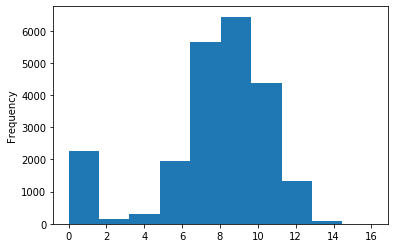

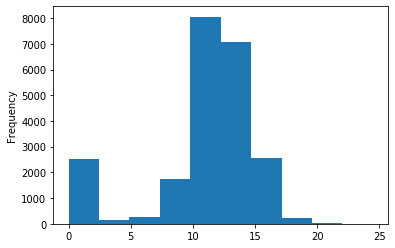

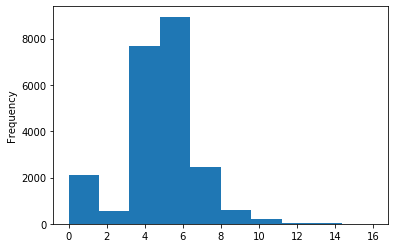

In [22]:
print(gold_recovery_full['primary_cleaner.output.concentrate_ag'].mean())
print(gold_recovery_full['rougher.output.concentrate_ag'].mean())
print(gold_recovery_full['final.output.concentrate_ag'].mean())

gold_recovery_full['primary_cleaner.output.concentrate_ag'].plot(kind = 'hist')
plt.show()
gold_recovery_full['rougher.output.concentrate_ag'].plot(kind = 'hist')
plt.show()
gold_recovery_full['final.output.concentrate_ag'].plot(kind = 'hist')
plt.show()

Вывод:
- Можно заметить, что с каждым шагом концентрация серебра уменьшается.

8.921109840609049
6.900646225251443
9.095308105450266


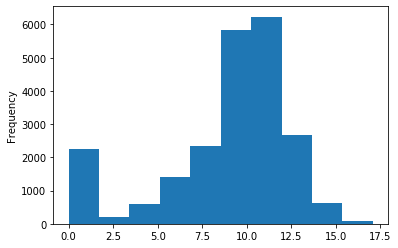

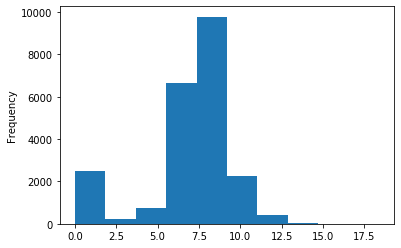

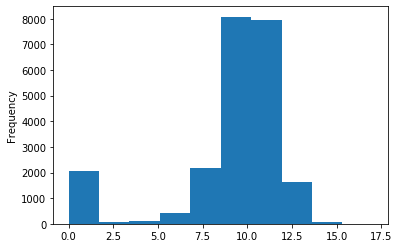

In [23]:
print(gold_recovery_full['primary_cleaner.output.concentrate_pb'].mean())
print(gold_recovery_full['rougher.output.concentrate_pb'].mean())
print(gold_recovery_full['final.output.concentrate_pb'].mean())

gold_recovery_full['primary_cleaner.output.concentrate_pb'].plot(kind = 'hist')
plt.show()
gold_recovery_full['rougher.output.concentrate_pb'].plot(kind = 'hist')
plt.show()
gold_recovery_full['final.output.concentrate_pb'].plot(kind = 'hist')
plt.show()

Вывод:
- Можно заметить, что после финальной очистки концентрация свинца остаётся примерно такой же, как и в самом начале.

29.2122887022116
17.879538203033484
40.001171896007136


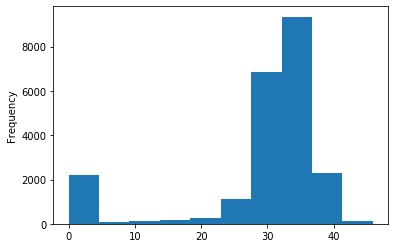

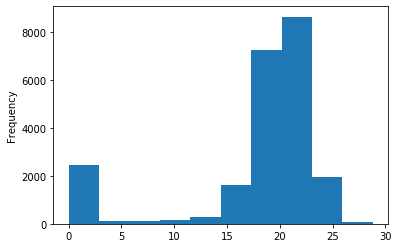

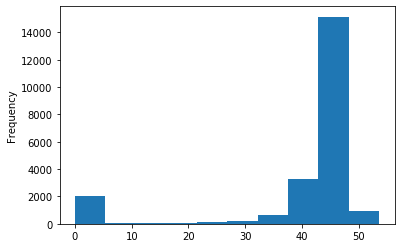

In [24]:
print(gold_recovery_full['primary_cleaner.output.concentrate_au'].mean())
print(gold_recovery_full['rougher.output.concentrate_au'].mean())
print(gold_recovery_full['final.output.concentrate_au'].mean())

gold_recovery_full['primary_cleaner.output.concentrate_au'].plot(kind = 'hist')
plt.show()
gold_recovery_full['rougher.output.concentrate_au'].plot(kind = 'hist')
plt.show()
gold_recovery_full['final.output.concentrate_au'].plot(kind = 'hist')
plt.show()

Вывод:
- Можно заметить, что после финальной очистки концентрация золота увеличивается.

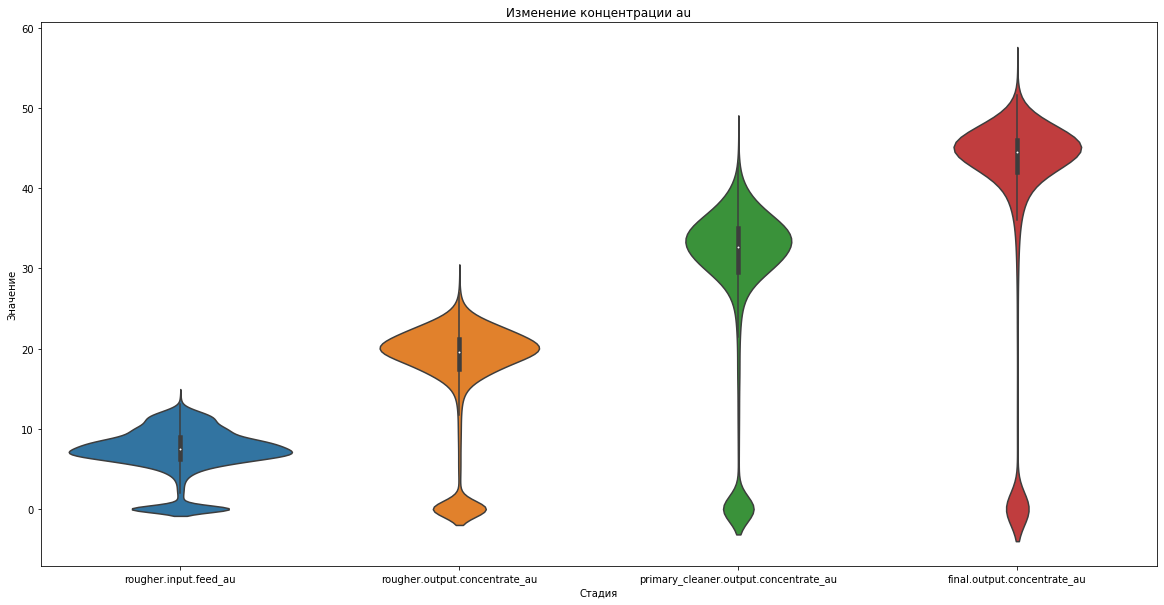

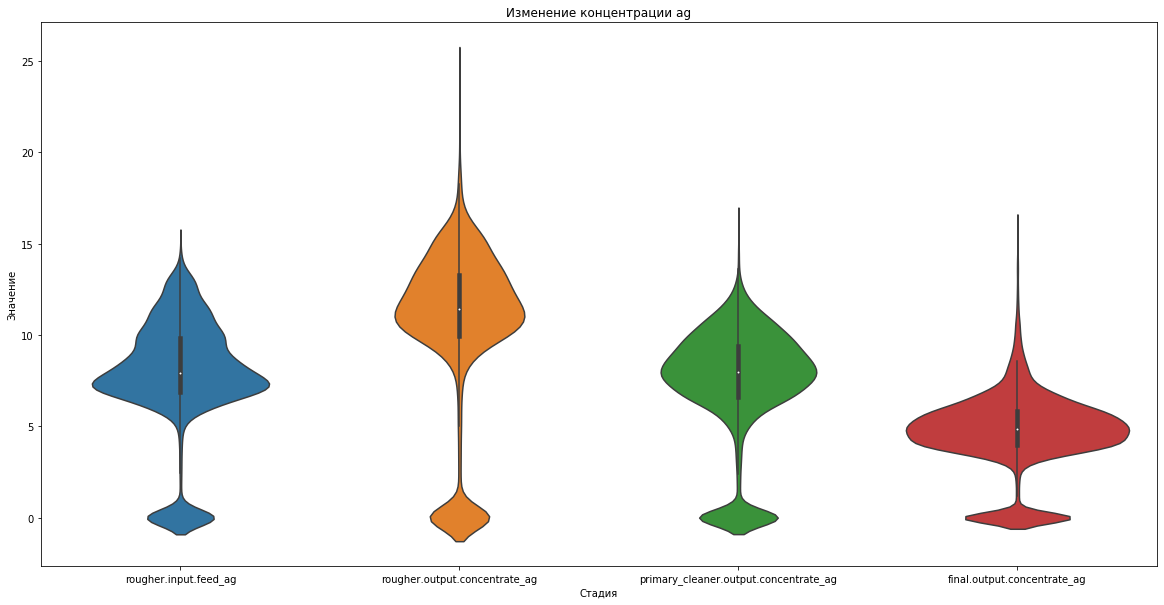

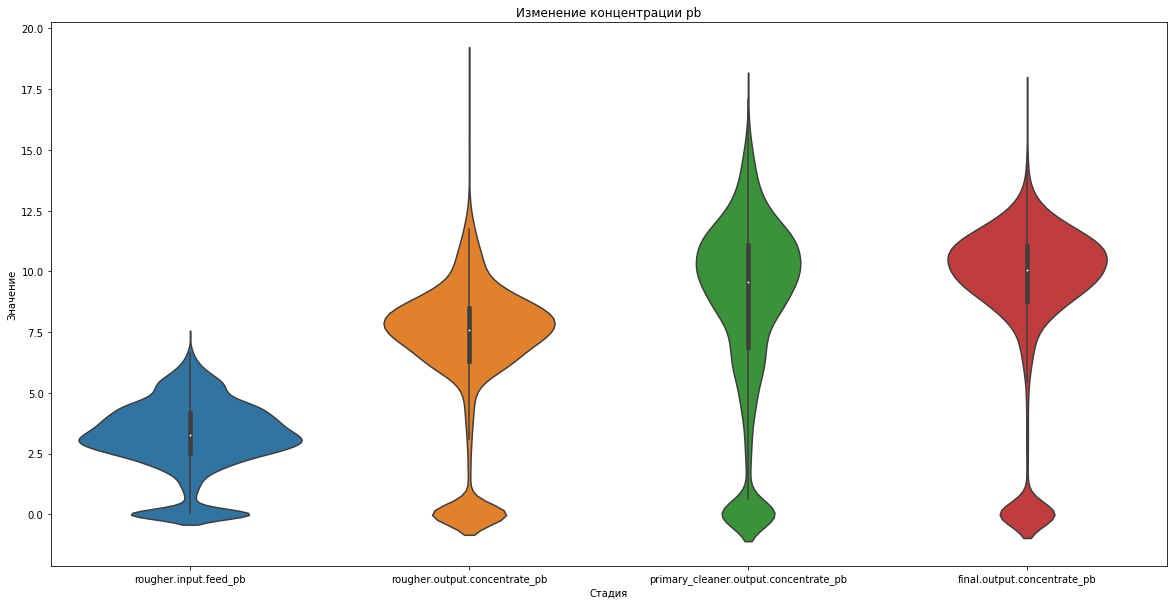

In [25]:
metals = ['au', 'ag', 'pb']
stages = ['rougher.input.feed_',
          'rougher.output.concentrate_',
          'primary_cleaner.output.concentrate_',
          'final.output.concentrate_']
for metal in metals:
    cols = [s + metal for s in stages]
    plt.figure(figsize = (20, 10))
    ax = sns.violinplot(
        x = 'variable', 
        y = 'value' , 
        data = pd.melt(gold_recovery_train_interpolate[cols])
    )
    
    plt.title('Изменение концентрации ' + metal)
    plt.xlabel('Стадия');
    plt.ylabel('Значение');

Общий вывод по 2.1:
- концентрация золота растёт практически линейно;
- концентация свинца растёт тоже практически линейно, но асимптотически;
- конецентрация серебра увеличивается после флотации и уменьшается с каждой стадией очистки.

# 2.2 Распределения размеров гранул сырья на train и test выборках.

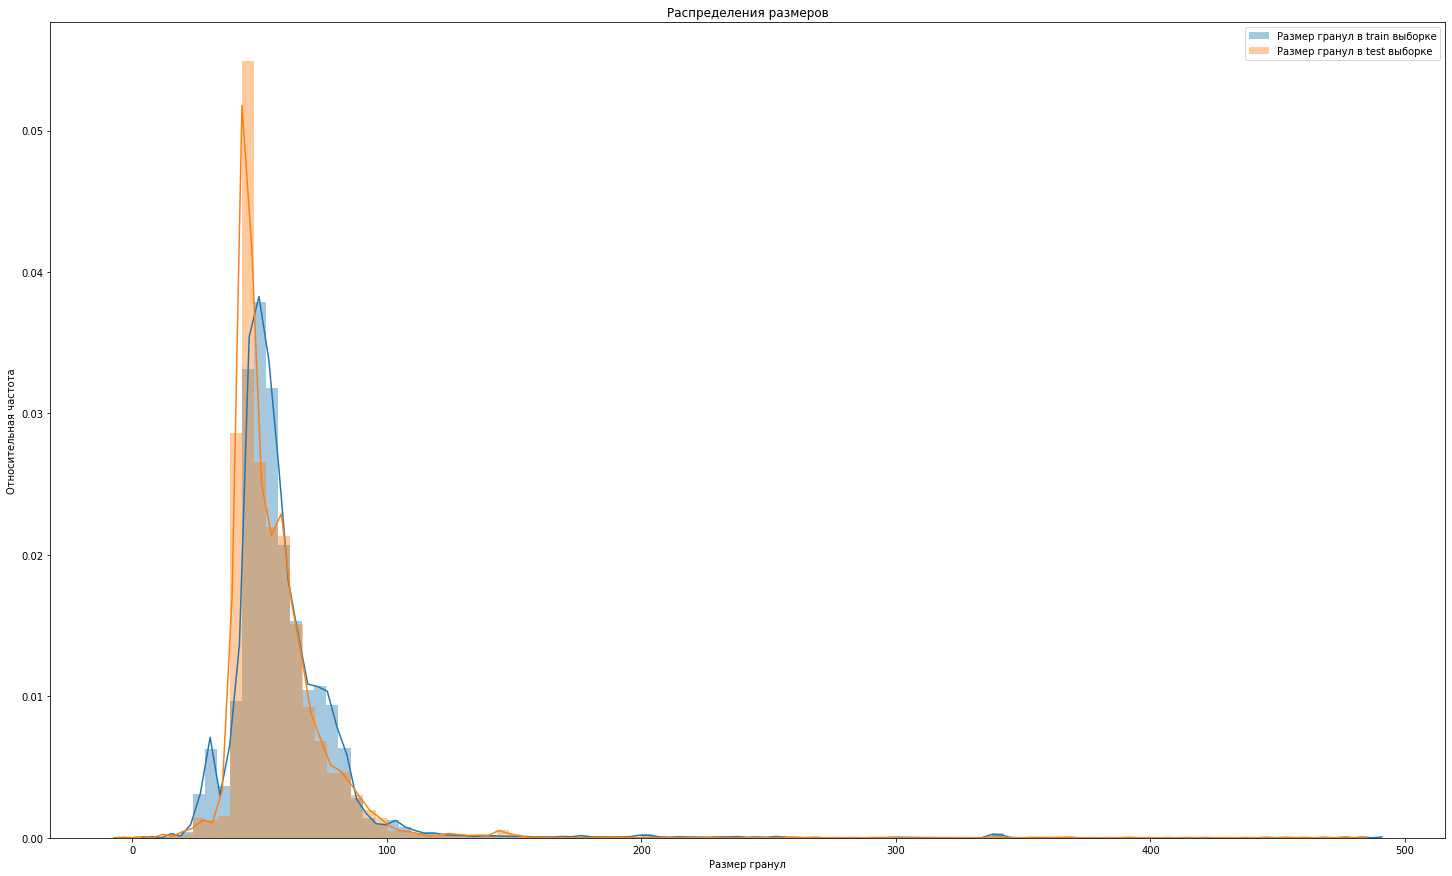

In [26]:
plt.figure(figsize=(25, 15))
sns.distplot(gold_recovery_train_interpolate['rougher.input.feed_size'], bins = 100, label = 'Размер гранул в train выборке')
sns.distplot(gold_recovery_test_interpolate['rougher.input.feed_size'], bins = 100, label = 'Размер гранул в test выборке')

plt.legend(loc = 'upper right')
plt.xlabel('Размер гранул');
plt.ylabel('Относительная частота');
plt.title('Распределения размеров');

Распределения похожи. Можно сделать вывод, что на оценке модели сказаться не должно.

# 2.3 Суммарная концентрация всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

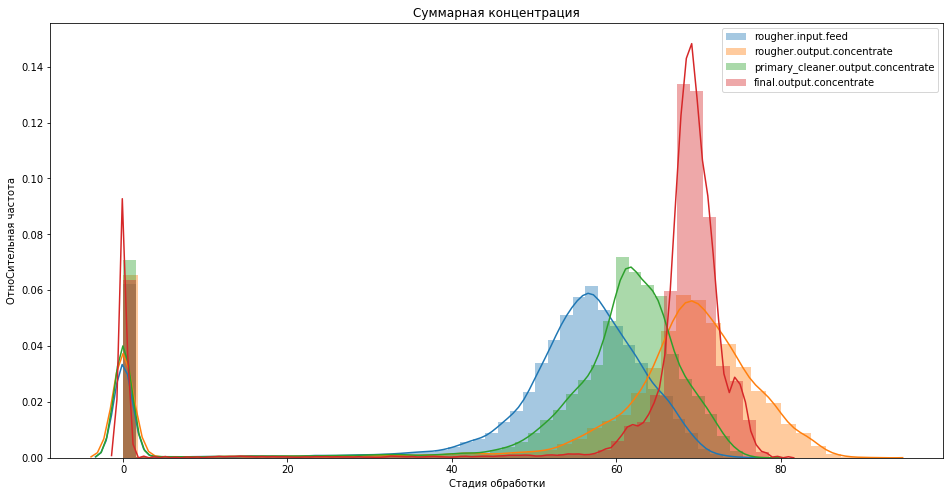

In [27]:
#СУММАРНАЯ КОНЦЕНТРАЦИЯ ВЕЩЕСТВ НА РАЗНЫХ СТАДИЯХ
materials = metals + ['sol']

plt.figure(figsize = (16, 8))
for stage in stages:
    cols = [(stage + material) for material in materials]
    concentrate_sum = gold_recovery_train_interpolate[cols].apply(np.sum, axis = 1)
    sns.distplot(concentrate_sum, label = stage[:-1])
    
    plt.legend(loc='upper right')
    plt.title('Суммарная концентрация')
    plt.xlabel('Стадия обработки');
    plt.ylabel('ОтноСительная частота');

ПРОМЕЖУТОЧНЫЙ ВЫВОД:
- после флотации средняя суммарная концентрация увеличивается;
- после первичной очистки средняя суммарная концентрация немного уменьшается;
- после вторичной очистки средняя суммарная концентрация увеличивается до уровня "после флотацияя".

Так же заметно наличие достаточно большего числа околонулевых значений суммарных концентраций.

------
Возьмём порог 0.1 и взглянем на новые распределения:

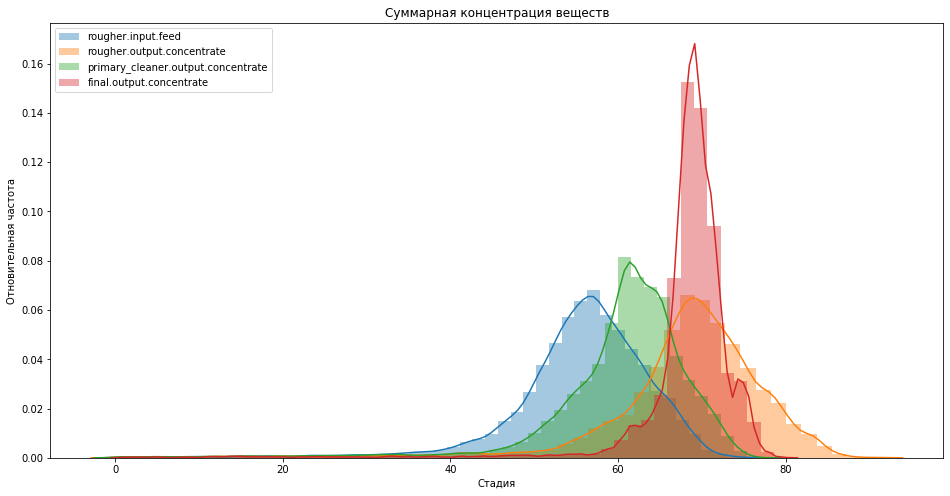

In [28]:
plt.figure(figsize = (16, 8))
for stage in stages:
    cols = [(stage + material) for material in materials]
    concentrate_sum = gold_recovery_train_interpolate[cols].apply(np.sum, axis = 1)
    sns.distplot(concentrate_sum[concentrate_sum > 0.1], label = stage[:-1])
    
    plt.legend(loc='upper left')
    plt.title('Суммарная концентрация веществ')
    plt.xlabel('Стадия');
    plt.ylabel('Отновительная частота');

Можем видить на графике, что аномалии успешно отфильтрованы. Далее удалим из выборок.

In [29]:
print('Размеры train выборки до удаления аномалий', gold_recovery_train_interpolate.shape)
print('Размеры test выборки до удаления аномалий', gold_recovery_test_interpolate.shape)
print('Размеры full выборки до удаления аномалий', gold_recovery_full_interpolate.shape)
print()
for stage in stages:
    cols = [stage + material for material in materials]
    
    concentrate_sum_train = gold_recovery_train_interpolate[cols].apply(np.sum, axis = 1)
    gold_train_ids = concentrate_sum_train[concentrate_sum_train > 0.1].index
    gold_recovery_train_interpolate = gold_recovery_train_interpolate.loc[gold_train_ids, :]
    
    #concentrate_sum_test = gold_recovery_test_interpolate[cols].apply(np.sum, axis = 1)
    #gold_test_ids = concentrate_sum_test[concentrate_sum_test > 0.1].index
    #gold_recovery_test_interpolate = gold_recovery_test_interpolate.loc[gold_test_ids, :]
    
    concentrate_sum_full = gold_recovery_full_interpolate[cols].apply(np.sum, axis = 1)
    gold_full_ids = concentrate_sum_full[concentrate_sum_full > 0.1].index
    gold_recovery_full_interpolate = gold_recovery_full_interpolate.loc[gold_full_ids, :]
    
    try:
        concentrate_sum_test = gold_recovery_test_interpolate[cols].apply(np.sum, axis = 1)
        gold_test_ids = concentrate_sum_test[concentrate_sum_test > 0.1].index
        gold_recovery_test_interpolate = gold_recovery_test_interpolate.loc[gold_test_ids, :]
    except:
        pass
    
print('Размеры train выборки после удаления аномалий', gold_recovery_train_interpolate.shape)
print('Размеры test выборки после удаления аномалий', gold_recovery_test_interpolate.shape)
print('Размеры full выборки после удаления аномалий', gold_recovery_full_interpolate.shape)

Размеры train выборки до удаления аномалий (16860, 87)
Размеры test выборки до удаления аномалий (5856, 53)
Размеры full выборки до удаления аномалий (22716, 87)

Размеры train выборки после удаления аномалий (14362, 87)
Размеры test выборки после удаления аномалий (5485, 53)
Размеры full выборки после удаления аномалий (19619, 87)


Аномалии были успешно удалены.

# 3. Модель

Напишем функцию для вычесления sMAPE. 

- sMAPE - симметричная средняя абсолютная процентная ошибка;
- final_sMAPE - рассчёт итоговой ошибке по формуле 0.25 * sMAPE_rougher + 0.75 * sMAPE_final.

In [30]:
def sMAPE(y_true, y_pred):
    Y_true = np.array(y_true)
    Y_pred = np.array(y_pred)
    if Y_true.shape != Y_pred.shape:
        print('Error: y_true and y_pred shape does not match! Got {} and {}'.format(str(Y_true.shape), str(Y_pred.shape)))
        return None
    try:
        smape = sum(2*abs(Y_true - Y_pred)/(abs(Y_true)+abs(Y_pred)))*100/len(Y_true)
    except Exception as e:
        exc_type = str(type(e)).split("'")[1]
        print('{}: {}'.format(exc_type, e))
        return None
    return smape


def final_sMAPE(y_true, y_pred):
    Y_true = np.array(y_true)
    Y_pred = np.array(y_pred)
    if Y_true.shape != Y_pred.shape:
        print('Error: y_true and y_pred shape does not match! Got {} and {}'.format(str(Y_true.shape), str(Y_pred.shape)))
        return None
    try:
        smape = sMAPE(Y_true, Y_pred)
        final_smape = 0.25 * smape[0] + 0.75 * smape[1]
    except Exception as e:
        exc_type = str(type(e)).split("'")[1]
        print('{}: {}'.format(exc_type, e))
        return None
    return final_smape

Далее создадим оценивающие функции для того, чтобы использовать их в перекрёстной проверке.

In [31]:
symmetric_mean_absolute_percentage_error = make_scorer(sMAPE, greater_is_better = False)
final_symmetric_mean_absolute_percantage_error = make_scorer(final_sMAPE, greater_is_better = False)

# Отбор признаков

Удалим из train выборки недостающие признаки. В целевую train выборку передадим эффективность обогащения руды(на стадиях флотации и на этапе очистки).

In [32]:
gold_recovery_test_interpolate_cols = gold_recovery_test_interpolate.columns
gold_recovery_full_interpolate_cols = gold_recovery_full_interpolate.columns
inaccessable_cols = set(gold_recovery_full_interpolate_cols) - set(gold_recovery_test_interpolate_cols)
inaccessable_cols

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

In [33]:
features_train = gold_recovery_train_interpolate.drop(columns = ['date', *inaccessable_cols])

target_cols = ['rougher.output.recovery', 'final.output.recovery']
target_train = gold_recovery_train_interpolate[target_cols]

features_train.shape, target_train.shape

((14362, 52), (14362, 2))

Из test выборки удалим даты. В целевую test выборку передадим значения эффективности для дат из тестовой выбоки.

In [34]:
features_test = gold_recovery_full_interpolate[gold_recovery_full_interpolate['date'].
    isin(gold_recovery_test_interpolate['date'])][gold_recovery_test_interpolate.columns].drop(columns=['date'])
target_test = gold_recovery_full_interpolate[gold_recovery_full_interpolate['date'].
    isin(gold_recovery_test_interpolate['date'])][target_cols]

features_test.shape, target_test.shape

((5257, 52), (5257, 2))

Построим "тепловую карту" для того, чтобы посмотреть на зависимости, для дальнейшего отбора признаков.

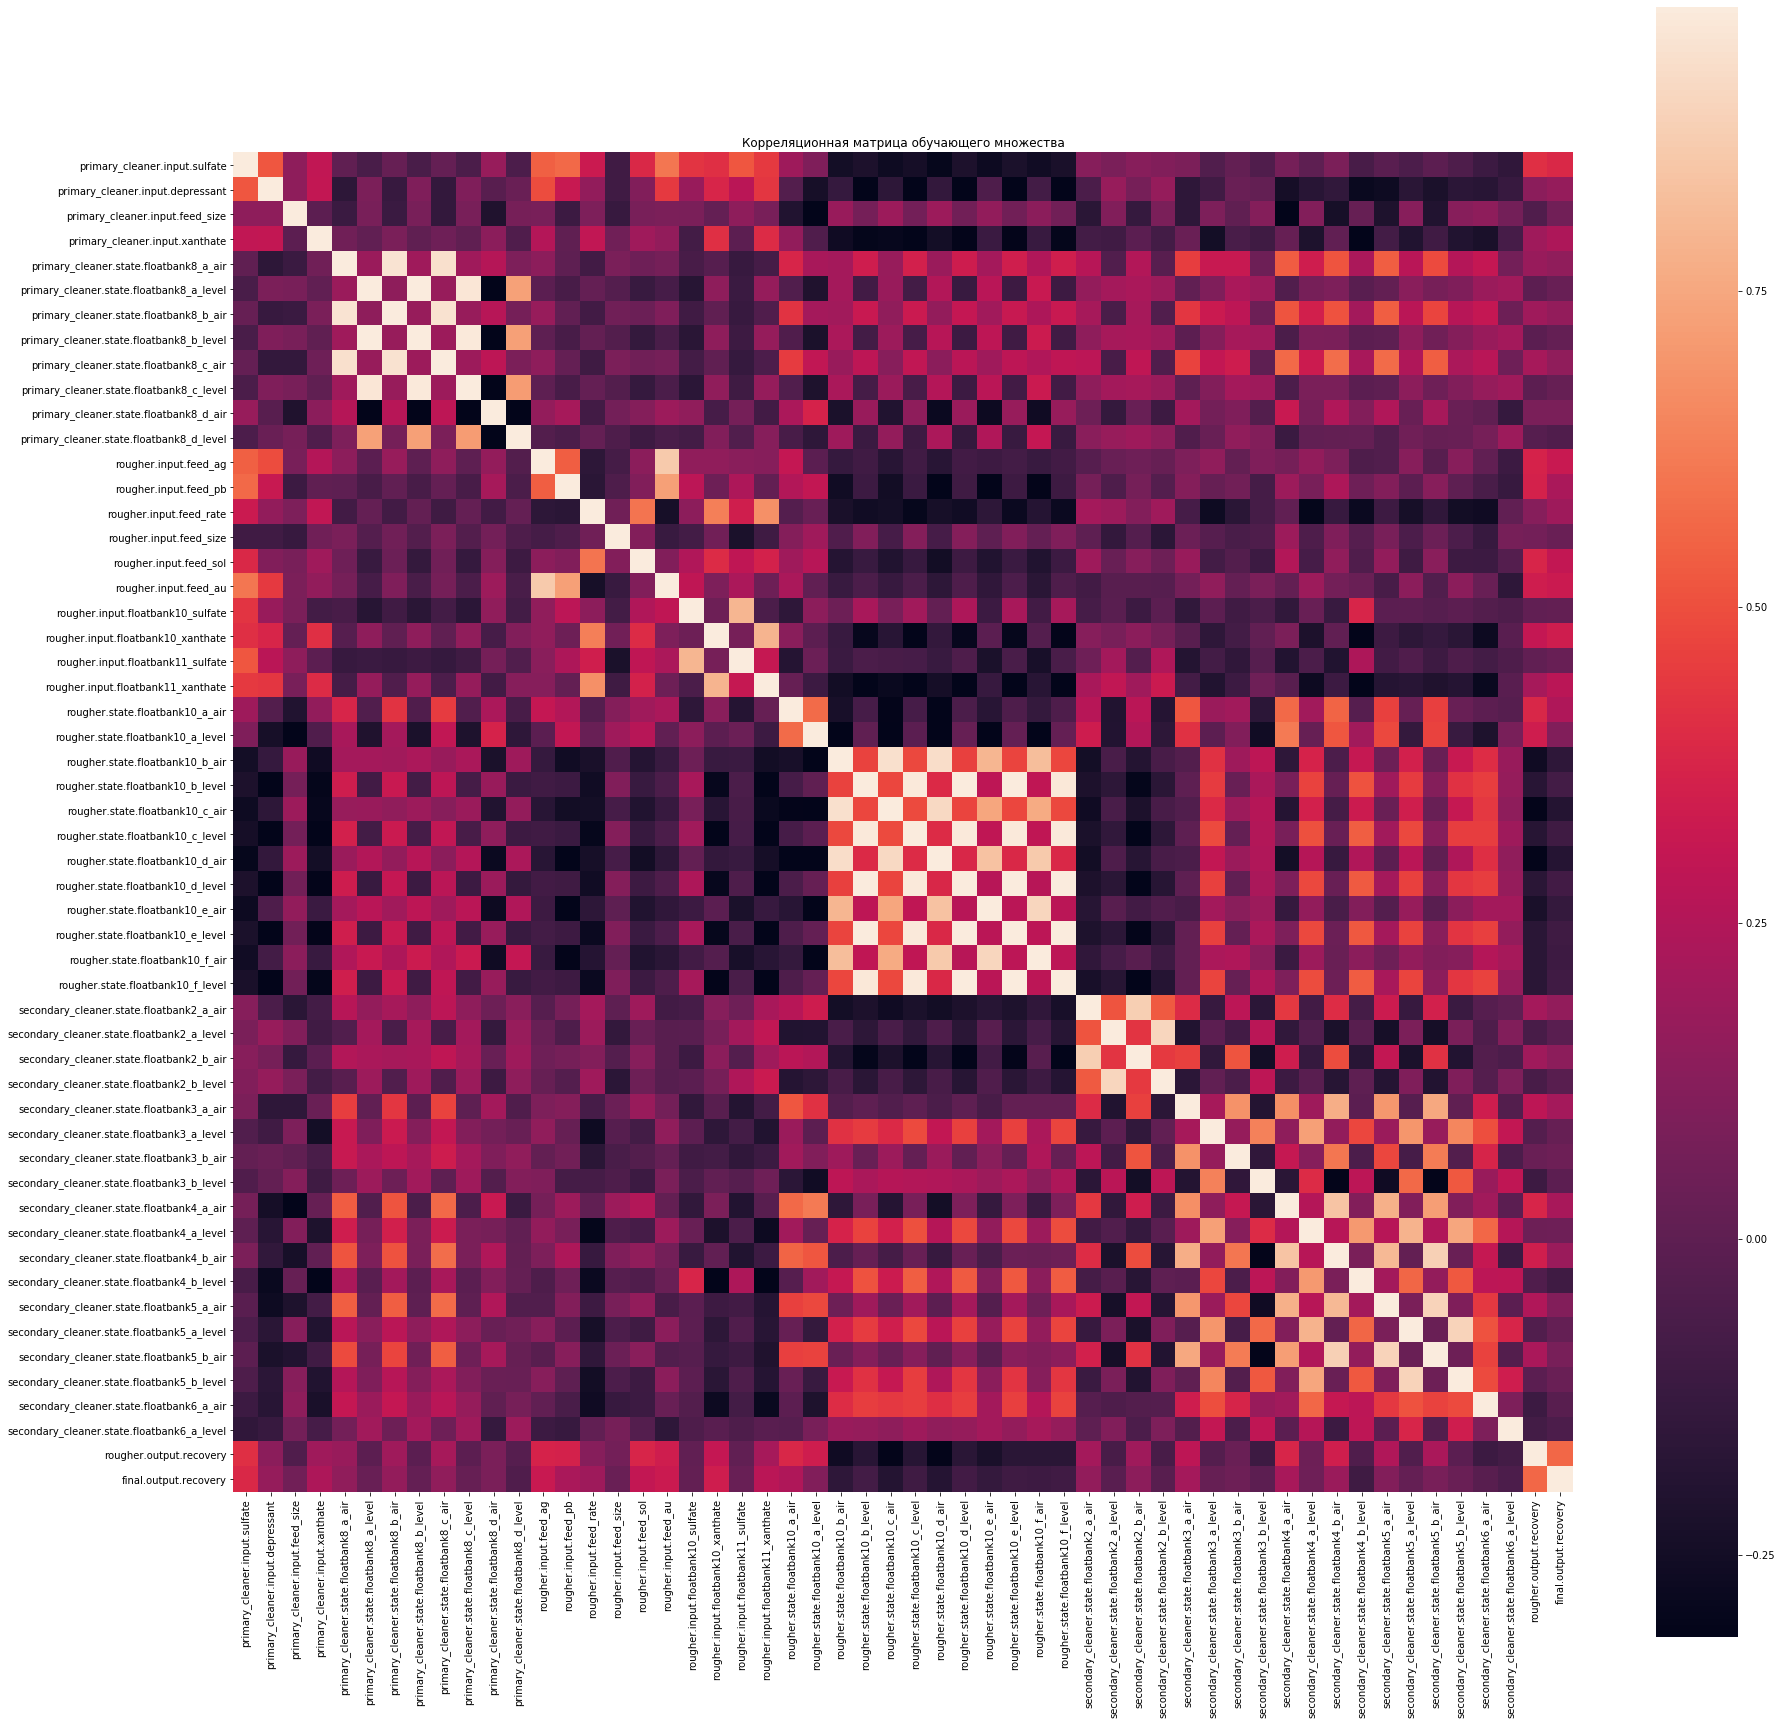

In [35]:
corr_matrix = (pd.concat([features_train, target_train], axis = 1)).corr()
plt.figure(figsize = (30, 30))
sns.heatmap(corr_matrix, robust = True, square = True)
plt.title('Корреляционная матрица обучающего множества')
plt.show()

Глядя на "тепловой карту", можем сделать вывод о наличии мультиколлинеарности в наших данных. Целевые признаки слабо коррелируют.


Отыщем признаки, между которыми есть сильная зависимость (коэффициент 0.9). После выберем лишь один, которые сильнее всего коррелирует с обоими целевыми признаками.

In [36]:
high_corr_features = []
train_corr = features_train.corr()

for col in features_train.columns[:-1]:
    train_corr.drop(index=col, inplace = True)
    corr_features = train_corr[train_corr[col]>0.9].index.tolist() + [col]
    corr_features_with_target = (
        corr_matrix
        .loc[corr_features, target_train.columns]
        .abs()
        .apply(np.sum, axis = 1)
        .sort_values(ascending=False)[1:]
    )
    
    high_corr_features.extend(corr_features_with_target.index.tolist())
    
set(high_corr_features)

{'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_level',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_d_air',
 'rougher.state.floatbank10_d_level',
 'rougher.state.floatbank10_e_level',
 'rougher.state.floatbank10_f_air',
 'rougher.state.floatbank10_f_level',
 'secondary_cleaner.state.floatbank2_a_level'}

Найдём признаки, слабо коррелирующие с целевым (коэффициент 0.2).

In [37]:
low_corr_with_target = []

for col in corr_matrix.columns[:-2]:
    loc_corr_df = corr_matrix.loc[target_train.columns, :]
    if len(loc_corr_df[abs(loc_corr_df[col]) < 0.2][col]) == 2:
        low_corr_with_target.extend([col])
        
set(low_corr_with_target)

{'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank11_sulfate',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_level',
 'rougher.state.floatbank10_d_level',
 'rougher.state.floatbank10_e_level',
 'rougher.state.floatbank10_f_air',
 'rougher.state.floatbank10_f_level',
 'secondary_cleaner.state.floatbank2_a_level',
 'secondary_cleaner.state.floatbank2_b_air',
 'secondary_cleaner.state.floatbank2_b_level',
 'secondary_cleaner.state.floatbank3_a_level',
 'secondary_cleaner.state.floatbank3_b_air',
 'secondary_cleaner.state.flo

Объединим признаки, удалим из из train и test выборок.

In [38]:
features_to_drop = set([*high_corr_features, *low_corr_with_target])
features_to_drop

{'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'rougher.input.feed_rate',
 'rougher.input.feed_size',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank11_sulfate',
 'rougher.state.floatbank10_b_air',
 'rougher.state.floatbank10_b_level',
 'rougher.state.floatbank10_c_level',
 'rougher.state.floatbank10_d_air',
 'rougher.state.floatbank10_d_level',
 'rougher.state.floatbank10_e_level',
 'rougher.state.floatbank10_f_air',
 'rougher.state.floatbank10_f_level',
 'secondary_cleaner.state.floatbank2_a_level',
 'secondary_cleaner.state.floatbank2_b_air',
 'secondary_cleaner.state.floatbank2_b_level',
 'secondary_cleaner.state.floatbank3_a_level',
 '

Удалим их из тренировочной и тестовой выборок.

In [39]:
features_train_reduced_by_corr_test = features_train.drop(columns = features_to_drop)
features_test_reduced_by_corr_test = features_test.drop(columns = features_to_drop)

print(features_train_reduced_by_corr_test.shape, features_test_reduced_by_corr_test.shape)
set(features_train_reduced_by_corr_test.columns)

(14362, 19) (5257, 19)


{'primary_cleaner.input.sulfate',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_c_air',
 'rougher.input.feed_ag',
 'rougher.input.feed_au',
 'rougher.input.feed_pb',
 'rougher.input.feed_sol',
 'rougher.input.floatbank10_xanthate',
 'rougher.input.floatbank11_xanthate',
 'rougher.state.floatbank10_a_air',
 'rougher.state.floatbank10_a_level',
 'rougher.state.floatbank10_c_air',
 'rougher.state.floatbank10_e_air',
 'secondary_cleaner.state.floatbank2_a_air',
 'secondary_cleaner.state.floatbank3_a_air',
 'secondary_cleaner.state.floatbank4_a_air',
 'secondary_cleaner.state.floatbank4_b_air',
 'secondary_cleaner.state.floatbank5_a_air',
 'secondary_cleaner.state.floatbank5_b_air'}

Далее выберем признаки, применяя модели и оценки важности признаков.

Для этого берём модель LinearRegression и метод RFECV. Посчитаем sMAPE для каждого признака в отдельности.

In [40]:
RANDOM_STATE = 12345
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV

LR = LinearRegression(n_jobs = -1)
kfold = KFold(n_splits = 10, shuffle = True, random_state = RANDOM_STATE)

rfecv_list = [
    RFECV(estimator=LR,min_features_to_select = 1,scoring=symmetric_mean_absolute_percentage_error,n_jobs = -1
                ).fit(features_train, target_train[col])
    for col in target_cols
]

Построим графики изменения качества модели в зависимости от кол-ва признаков.

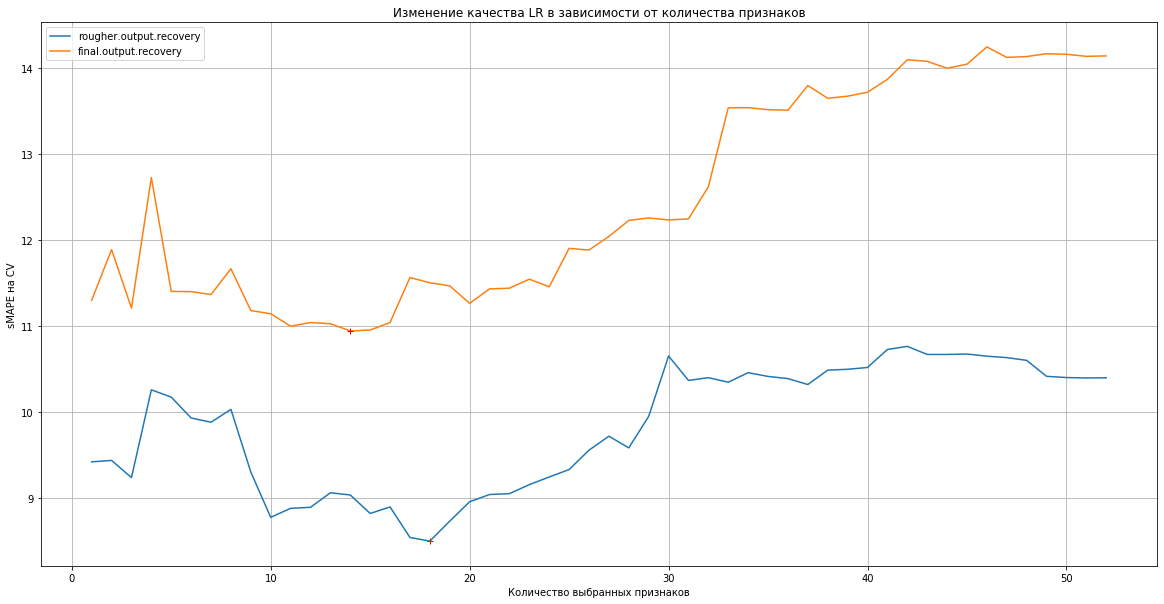

In [44]:
plt.figure(figsize=(20, 10))

for col, rfe in zip(target_cols, rfecv_list):
    scores = -rfe.grid_scores_
    best_n_features = rfe.n_features_
    
    plt.plot(range(1, len(scores)+1), scores, label=col)
    plt.plot(best_n_features, min(scores), 'r+')
    
plt.legend(loc='upper left')
plt.title('Изменение качества LR в зависимости от количества признаков')
plt.xlabel('Количество выбранных признаков')
plt.ylabel('sMAPE на CV')
plt.grid(True)
plt.show()

Минимумы метрик не совпадают, что говорит нам о том, что часть признаков, которая была отобрана (которые мы считали лучшими) на одном целевом признаке, не попала в разряд "лучших" на другом.

Построим график для final_sMAPE:

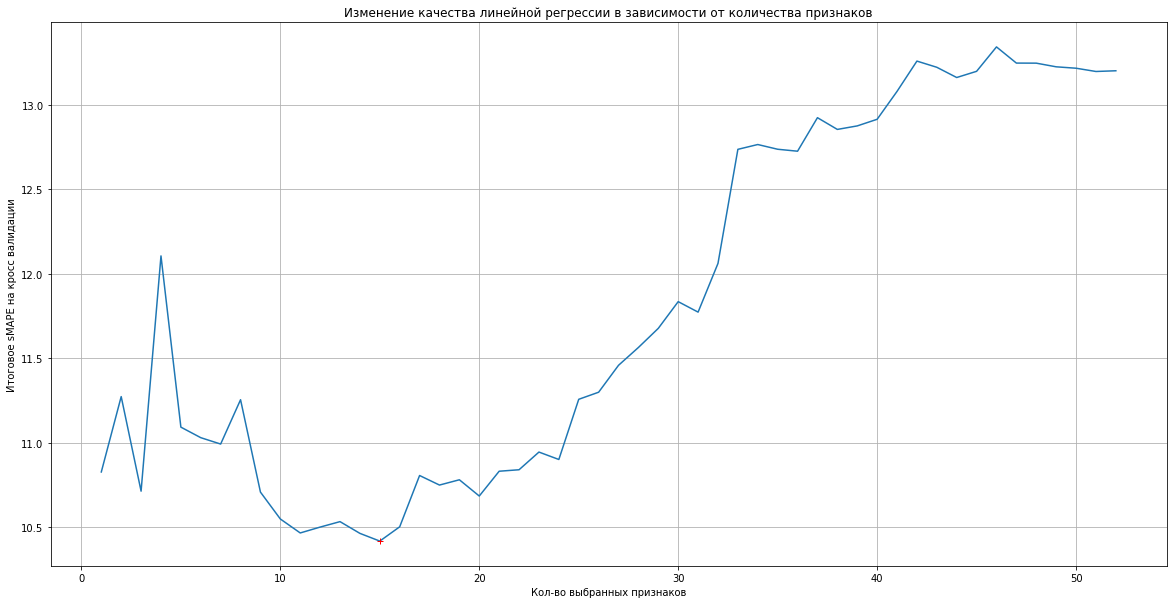

Лучшее количество признаков 15
Лучшее итоговое sMAPE: 10.41850


In [45]:
plt.figure(figsize=(20,10))

scores = 0.25* -rfecv_list[0].grid_scores_ + 0.75* -rfecv_list[1].grid_scores_
best_n_features = np.where(scores == min(scores))[0][0] + 1
plt.plot(range(1, len(scores)+1), scores)
plt.plot(best_n_features, min(scores), 'r+')

plt.title('Изменение качества линейной регрессии в зависимости от количества признаков')
plt.xlabel('Кол-во выбранных признаков')
plt.ylabel('Итоговое sMAPE на кросс валидации')
plt.grid(True)
plt.show()

print('Лучшее количество признаков', best_n_features)
print('Лучшее итоговое sMAPE: {:.5f}'.format(min(scores)))

Здесь минимум по качеству соответствует 15 призакам в train выборке. Но необязательно получится такой же результат при пересечении лучших признаков.

Теперь найдём признаки лучшие признаки на обоих целевых признаков.

In [46]:
mask = rfecv_list[0].support_ & rfecv_list[1].support_
selected_features = features_train.columns[mask]
set(selected_features)

{'primary_cleaner.input.feed_size',
 'primary_cleaner.input.xanthate',
 'rougher.input.feed_ag',
 'rougher.input.feed_au',
 'rougher.input.feed_pb',
 'rougher.input.feed_sol',
 'rougher.input.floatbank10_sulfate',
 'rougher.input.floatbank10_xanthate',
 'secondary_cleaner.state.floatbank2_a_air',
 'secondary_cleaner.state.floatbank2_b_air',
 'secondary_cleaner.state.floatbank3_a_air',
 'secondary_cleaner.state.floatbank4_b_air',
 'secondary_cleaner.state.floatbank5_a_air'}

13 признаков. Таким образом качество не должно отначительно отличаться от минимального на графике выше.

Извлечём выбранные признаки и инициализируем новые train и test выборки.

In [47]:
features_train_reduced_by_rfe_lin = features_train[selected_features]
features_test_reduced_by_rfe_lin = features_test[selected_features]

print(features_train_reduced_by_rfe_lin.shape, features_test_reduced_by_rfe_lin.shape)

(14362, 13) (5257, 13)


# Построение бейслайнов

Соберём вместе обучающие и тестовые признаки. Возьмём для обучения модели LR, DecisionTree и RF. Проведём перекрёстную проверку для надёжности результатов, в качестве метрики передадим в метод скорер финального sMAPE. Выведем результаты CV.

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

features_train_test_dict = {
    'полных выборок': [features_train, features_test],
    'уменьшенных выборок после corr анализа': [features_train_reduced_by_corr_test, features_test_reduced_by_corr_test],
    'уменьшенных выборок после рекурсивного анализа': [features_train_reduced_by_rfe_lin, features_test_reduced_by_rfe_lin]
}

models_dict = {
    'Линейная регрессия': LinearRegression(n_jobs=-1),
    'Линейная регрессия с нормализацией': LinearRegression(normalize=True, n_jobs=-1),
    'Дерево решений': DecisionTreeRegressor(random_state=RANDOM_STATE),
    'Случайный лес': RandomForestRegressor(n_jobs=-1, random_state=RANDOM_STATE)
}

kfold = KFold(n_splits=5, shuffle = True, random_state=RANDOM_STATE)

for model_desc, models in models_dict.items():
    print(model_desc)
    for desc, feat in features_train_test_dict.items():
        cv_scores = cross_val_score(
            estimator = models,
            X = feat[0],
            y = target_train,
            scoring=final_symmetric_mean_absolute_percantage_error,
            cv=kfold,
            n_jobs = -1
        )
        
        metric = -cv_scores.mean()
        print('sMAPE на', desc, '= {:.5f}'.format(metric))
    print()

Линейная регрессия
sMAPE на полных выборок = 7.66620
sMAPE на уменьшенных выборок после corr анализа = 8.00783
sMAPE на уменьшенных выборок после рекурсивного анализа = 8.04415

Линейная регрессия с нормализацией
sMAPE на полных выборок = 7.66620
sMAPE на уменьшенных выборок после corr анализа = 8.00783
sMAPE на уменьшенных выборок после рекурсивного анализа = 8.04415

Дерево решений
sMAPE на полных выборок = 7.37242
sMAPE на уменьшенных выборок после corr анализа = 7.37431
sMAPE на уменьшенных выборок после рекурсивного анализа = 7.28561

Случайный лес
sMAPE на полных выборок = 5.55082
sMAPE на уменьшенных выборок после corr анализа = 5.52643
sMAPE на уменьшенных выборок после рекурсивного анализа = 5.54820



Все модели показали результат sMAPE 8%(или чуть больше), либо меньше. 

Можно сделать вывод, что лучше обучилась модель Случайного Леса. В теории возможно, что такие хорошие результаты у модели случайного леса вышла из-за того, что модель переобучилась.



# Оптимизируем параметры

Настроим гиперпараметры:

In [49]:
from sklearn.model_selection import GridSearchCV

def fill_confidence_interval(x, y, y_std, half_interval=3):
    ci_up_lim = y + half_interval*y_std
    ci_low_lim = y - half_interval*y_std
    plt.fill_between(x, ci_up_lim, ci_low_lim, alpha = 0.5)
    
def RF_hyperparameters(x_train, y_train):
    rfr = RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1)
    
    rng = range(10, 110, 30)
    params = {'n_estimators': rng}
    
    rfr_grid = GridSearchCV(estimator = rfr,param_grid = params,cv = kfold,
                    scoring = final_symmetric_mean_absolute_percantage_error,n_jobs = -1,return_train_score = True)
    rfr_grid.fit(x_train, y_train)
    
    train_score = -rfr_grid.cv_results_['mean_train_score']
    train_std = rfr_grid.cv_results_['std_train_score']
    test_score = -rfr_grid.cv_results_['mean_test_score']
    test_std = rfr_grid.cv_results_['std_test_score']
    x = rng
    
    plt.figure(figsize=(10, 8))
    
    fill_confidence_interval(x, train_score, train_std)
    fill_confidence_interval(x, test_score, test_std)
    plt.plot(x, train_score, "b", label = 'Обучение')
    plt.plot(x, test_score, "r", label = 'Валидация')
    plt.scatter(rfr_grid.best_params_['n_estimators'], test_score.min(), c = 'red', s = 40)
    plt.legend(loc = 'upper center')
    plt.xticks(ticks=x)
    plt.xlabel('Число деревьев')
    plt.ylabel('Итоговое sMAPE')
    plt.title('Итоговое sMAPE на train и valid выборке')
    plt.grid(True)
    
    n_estimators_ = rfr_grid.best_params_['n_estimators']
    
    rfr = RandomForestRegressor(n_estimators=n_estimators_, random_state=17, n_jobs=-1)
    rng = range(5, 25, 4)
    params = {'max_depth': rng}
    rfr_grid = GridSearchCV(rfr,params,cv=kfold,scoring = final_symmetric_mean_absolute_percantage_error,n_jobs=-1,
        return_train_score=True)
    rfr_grid.fit(x_train, y_train)
    
    rfr_best = rfr_grid.best_params_
    
    train_score = -rfr_grid.cv_results_['mean_train_score']
    train_std = rfr_grid.cv_results_['std_train_score']
    test_score = -rfr_grid.cv_results_['mean_test_score']
    test_std = rfr_grid.cv_results_['std_test_score'] 
    x = rng
    
    plt.figure(figsize=(10, 8))
    
    fill_confidence_interval(x, train_score, train_std)
    fill_confidence_interval(x, test_score, test_std)
    plt.plot(x, train_score, "b", label = 'Обучение')
    plt.plot(x, test_score, "r", label = 'Валидация')
    plt.scatter(rfr_grid.best_params_['max_depth'], test_score.min(), c = 'red', s = 40)
    plt.legend(loc = 'upper center')
    plt.xticks(ticks=x)
    plt.xlabel('Максимальная глубина деревьев')
    plt.ylabel('Итоговое sMAPE')
    tt1 = 'Итоговое sMAPE на train и valid выборке, число деревьев = '+ str(n_estimators_)
    plt.title(tt1)
    plt.grid(True)
    
    print('Лучшее итогове sMAPE на train выборке: {:.5f}'.format(train_score[test_score==test_score.min()][0]))
    print('Лучшее итогове sMAPE на valid выборке: {:.5f}'.format(test_score.min()))
    print()
    print('Лучшие параметры RF:')
    print('Число деревьев:', n_estimators_)
    print('Максимальная глубина =', rfr_grid.best_params_['max_depth'])
    plt.show()
    
    return rfr_best

Проведём CV и выведем выбранные гиперпараметры.

CV на полных выборок
Лучшее итогове sMAPE на train выборке: 2.37637
Лучшее итогове sMAPE на valid выборке: 5.21872

Лучшие параметры RF:
Число деревьев: 100
Максимальная глубина = 21


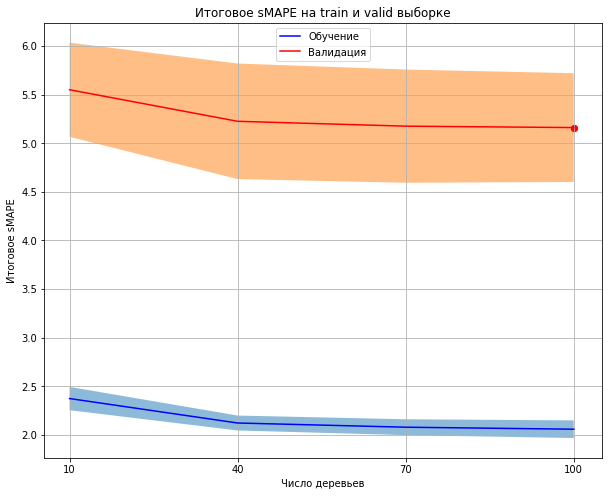

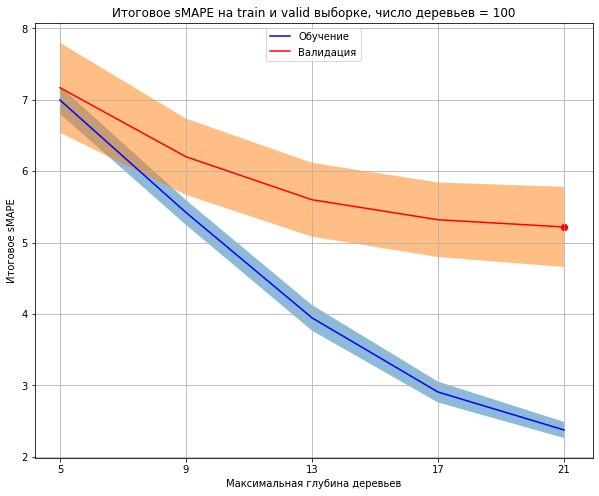


CV на уменьшенных выборок после corr анализа
Лучшее итогове sMAPE на train выборке: 2.29574
Лучшее итогове sMAPE на valid выборке: 5.20400

Лучшие параметры RF:
Число деревьев: 100
Максимальная глубина = 21


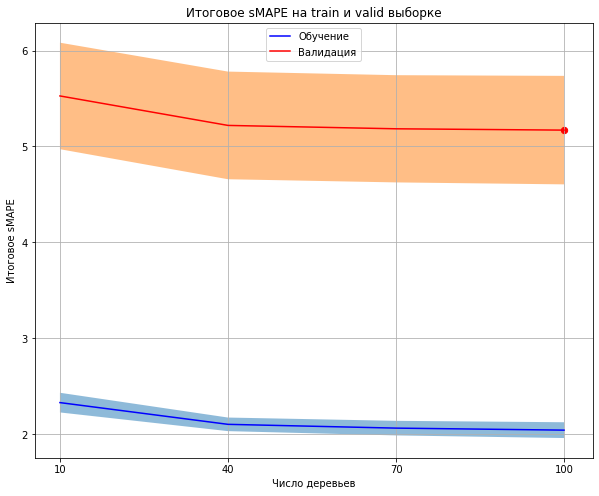

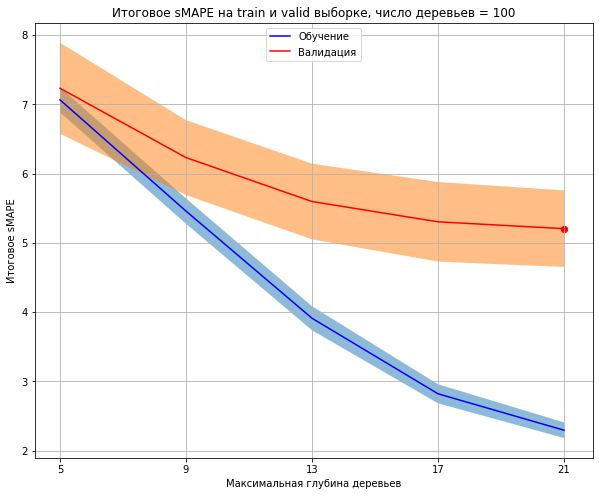


CV на уменьшенных выборок после рекурсивного анализа
Лучшее итогове sMAPE на train выборке: 2.33600
Лучшее итогове sMAPE на valid выборке: 5.19669

Лучшие параметры RF:
Число деревьев: 100
Максимальная глубина = 21


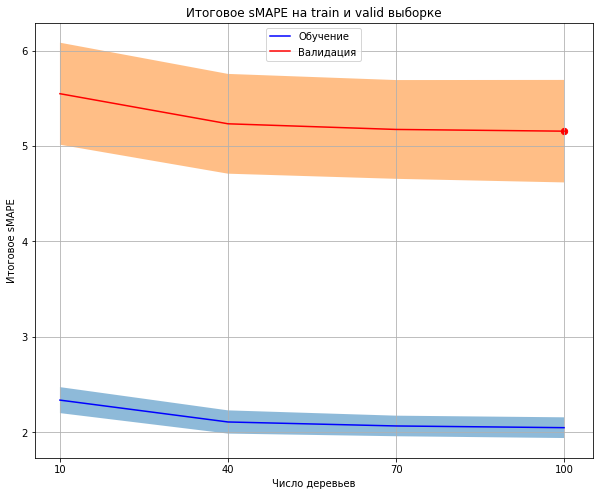

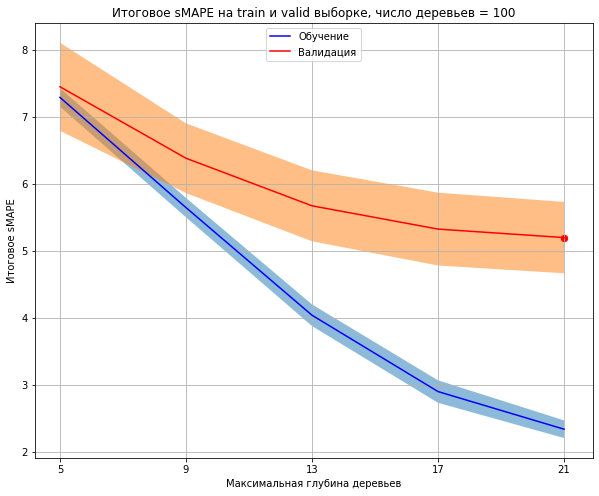

In [50]:
rfr_list = []

for desc, feat in features_train_test_dict.items():
    print('CV на ' + desc)
    best_model = RF_hyperparameters(feat[0], target_train)
    rfr_list.append(best_model)
    print()

Качество хорошее, но видно, что на каждой выборке модель переобучаться: метрика на train частях в два раза меньше, чем на valid. В связи с этим необходимо уменьшить переобучение.

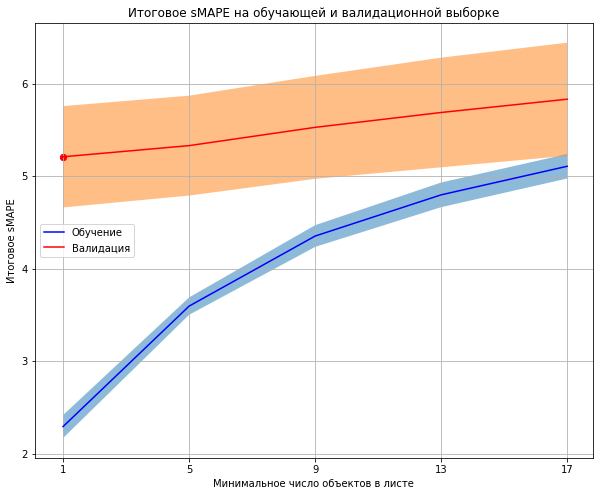

In [51]:
rfr = RandomForestRegressor(n_estimators = 100, max_depth = 21, random_state = RANDOM_STATE, n_jobs = -1)

rng = range(1, 18, 4)
params = {'min_samples_leaf': rng}

rfr_grid = GridSearchCV(estimator = rfr,param_grid=params,cv=kfold,
                scoring = final_symmetric_mean_absolute_percantage_error,n_jobs=-1,return_train_score=True)

rfr_grid.fit(features_train_reduced_by_corr_test, target_train)

train_score = -rfr_grid.cv_results_['mean_train_score']
train_std = rfr_grid.cv_results_['std_train_score']
test_score = -rfr_grid.cv_results_['mean_test_score']
test_std = rfr_grid.cv_results_['std_test_score'] 
x = rng

plt.figure(figsize = (10, 8))

fill_confidence_interval(x, train_score, train_std)
fill_confidence_interval(x, test_score, test_std)
plt.plot(x, train_score, 'b', label = 'Обучение')
plt.plot(x, test_score, 'r', label = 'Валидация')
plt.scatter(rfr_grid.best_params_['min_samples_leaf'], test_score.min(), c = 'red', s = 40)
plt.legend(loc = 'center left')
plt.xticks(ticks=x)
plt.xlabel('Минимальное число объектов в листе')
plt.ylabel('Итоговое sMAPE')
plt.title('Итоговое sMAPE на обучающей и валидационной выборке')
plt.grid(True)

Видно, что если взять минимальное число объектов(17), то можно избежать проблемы обучания, но мы немного потеряем в качестве метрики sMAPE(1%)

# Тестирование моделей

Выведем результаты тестирования линейных моделей и случайного леса на трёх видах выборок.

In [52]:
test_smape_list = []

for desc, feat in features_train_test_dict.items():
    LinReg = LinearRegression(normalize=True, n_jobs=-1)
    LinReg.fit(feat[0], target_train)
    
    final_smape = final_sMAPE(target_test, LinReg.predict(feat[1]))
    test_smape_list.append(final_smape)
    print('Итоговое sMAPE LR на '+desc+': {:.5f}'.format(final_smape))

Итоговое sMAPE LR на полных выборок: 7.48482
Итоговое sMAPE LR на уменьшенных выборок после corr анализа: 6.90059
Итоговое sMAPE LR на уменьшенных выборок после рекурсивного анализа: 7.03984


In [53]:

for desc, feat in features_train_test_dict.items():
    decion_tree = DecisionTreeRegressor(random_state=RANDOM_STATE)
    decion_tree.fit(feat[0], target_train)
    
    final_smape = final_sMAPE(target_test, decion_tree.predict(feat[1]))
    test_smape_list.append(final_smape)
    print('Итоговое sMAPE DecisionTree на '+ desc + ': {:.5f}'.format(final_smape))

Итоговое sMAPE DecisionTree на полных выборок: 16.80339
Итоговое sMAPE DecisionTree на уменьшенных выборок после corr анализа: 15.59251
Итоговое sMAPE DecisionTree на уменьшенных выборок после рекурсивного анализа: 12.73052


In [54]:
for desc, feat in features_train_test_dict.items():
    rfr = RandomForestRegressor(n_estimators=100, max_depth=21, min_samples_leaf=17, n_jobs=-1, random_state=RANDOM_STATE)
    rfr.fit(feat[0], target_train)
    
    final_smape = final_sMAPE(target_test, rfr.predict(feat[1]))
    test_smape_list.append(final_smape)
    print('Итоговое sMAPE RF на '+desc+': {:.5f}'.format(final_smape))

Итоговое sMAPE RF на полных выборок: 7.56977
Итоговое sMAPE RF на уменьшенных выборок после corr анализа: 7.16453
Итоговое sMAPE RF на уменьшенных выборок после рекурсивного анализа: 7.28234


Видно, что по качеству выиграла модель LR на уменьшенных выборках после корреляционного анализа.

Проверим модели на адекватность: сравним их качество с качеством на тестовой выборке фиктивной регрессионной модели(0 и 1).

In [55]:
from sklearn.dummy import DummyRegressor

strategy_list = ['mean', 'median']

for strategy in strategy_list:
    print('Выбранная фиктивная стратегия: '+ strategy)
    for desc, feat in features_train_test_dict.items():
        dummy_reg = DummyRegressor(strategy=strategy)
        dummy_reg.fit(feat[0], target_train)
        
        final_smape = final_sMAPE(target_test, dummy_reg.predict(feat[1]))
        print('Итоговое sMAPE фиктивной модели на '+desc+': {:.5f}'.format(final_smape))
    test_smape_list.append(final_smape)
    print()

Выбранная фиктивная стратегия: mean
Итоговое sMAPE фиктивной модели на полных выборок: 8.14011
Итоговое sMAPE фиктивной модели на уменьшенных выборок после corr анализа: 8.14011
Итоговое sMAPE фиктивной модели на уменьшенных выборок после рекурсивного анализа: 8.14011

Выбранная фиктивная стратегия: median
Итоговое sMAPE фиктивной модели на полных выборок: 7.65220
Итоговое sMAPE фиктивной модели на уменьшенных выборок после corr анализа: 7.65220
Итоговое sMAPE фиктивной модели на уменьшенных выборок после рекурсивного анализа: 7.65220



Качество моделей (LR и RF) немного лучше, чем у фиктивной. 

# Вывод

- написана функция final_sMAPE;
- обучены модели LR, DecisionTree, RF. Проведена перекрёстная проверка дя надёжности результатов, в качестве метрики использовали sMAPE;
- Все подели показали результат sMAPE меньше 8%, лучше всех обучилась модель RF, что неслучайно, т.к. с настройками по умолчанию RF склонен переобучаться, что может привести к плохим результатам на тесте;
- произведен подбор гиперпараметров для модели RF:
    - число деревье - 100;
    - max_depth - 21;
    - минимальное чило объектов 17.
- на тестовой выборке лучший результат показала LR на уменьшенной выборке после corr анализа, sMAPE = 6.901%;
- качество моделей было проверено на адекватность, все результаты оказались адекватными.